In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
# Importing dataset
data = pd.read_csv('Wine.csv')

In [3]:
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [103]:
data['ID'] = range(1, 179, 1)
data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     Hierarchical_labels   ID  
0                      2    1  
1                      2    2  
2                      2    3  
3                      2    4  
4                      2    5  
..                   ...  ...  
173                    1  174  
174                    1  175  
175                    1  176  
176                    1  177  
177                    1  178  

[178 rows x 16 columns]

### Data Exploration

In [5]:
data['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [6]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [7]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

#### Dropping Type Feature as it is a classifier that we have three types of wines which we need tp find in clustering by keeping it will affect our inferences and further analysis

In [8]:
df = data.drop('Type',axis=1)
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  
0           0.28             2.29   5.64  1.04      3.92     1065   1  
1           0.26             1.28   4.38  1.05      3.40     1050   2  
2           0.30             2.81   5.68  1.03      3.17     1185   3  
3           0.24             2.18   7.80  0.86      3.45     1480   4  
4           0.39             1.82   4.32  1.04      2.93      735   5

In [9]:
df.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453         0.572359    2.318286    0.228572   
min      0.340000       0.130000         0.410000    1.280000    0.480000   
25%      1.205000       0.270000         1.250000    3.220000    0.782500   
50%      2.135000       0.340000         1.555000    4.690000    0.965000   
75%      2.875000       0.437500         1.950000    6.200000    1.120000   
max      5.080000       0.660000         3.580000   13.000000    1.710000   

         Dilution      Proline          ID  
count  178.000000   178.000000  178.000000  
mean     2.611685   746.893258   89.500000  
std      0.709990   314.907474   51.528309  
min      1.270000   278.000000    1.000000  
25%      1.937500   500.500000   45.250000  
50%      2.780000   673.500000   89.500000  
75%      3.170000   985.000000  133.750000  
max      4.000000  1680.000000  178.000000

In [10]:



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Missing Values

In [11]:
# null count for columns
null_count_col  = df.isnull().sum().value_counts(ascending=False)

# null percentage for columns
null_percent_col = (df.isnull().sum()*100/len(df)).value_counts(ascending=False)

print('Null Count for Columns:\n\n',null_count_col,'\n')
print('Null Percentage for Columns:\n\n',null_percent_col)

Null Count for Columns:

 0    14
dtype: int64 

Null Percentage for Columns:

 0.0    14
dtype: int64


In [12]:
# null count for rows
null_count_row  = df.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for columns
null_percent_row = (df.isnull().sum(axis=1)*100/len(df)).value_counts(ascending=False)

print('Null Count for Rows:\n\n',null_count_row,'\n')
print('Null Percentage for Rows:\n\n',null_percent_row)

Null Count for Rows:

 0    178
dtype: int64 

Null Percentage for Rows:

 0.0    178
dtype: int64


### Duplicated Values

In [13]:
df.duplicated().sum()

0

#### So, There are no missing /Null and Duplicated values either in columns or rows.

### Exploratory Data Analysis

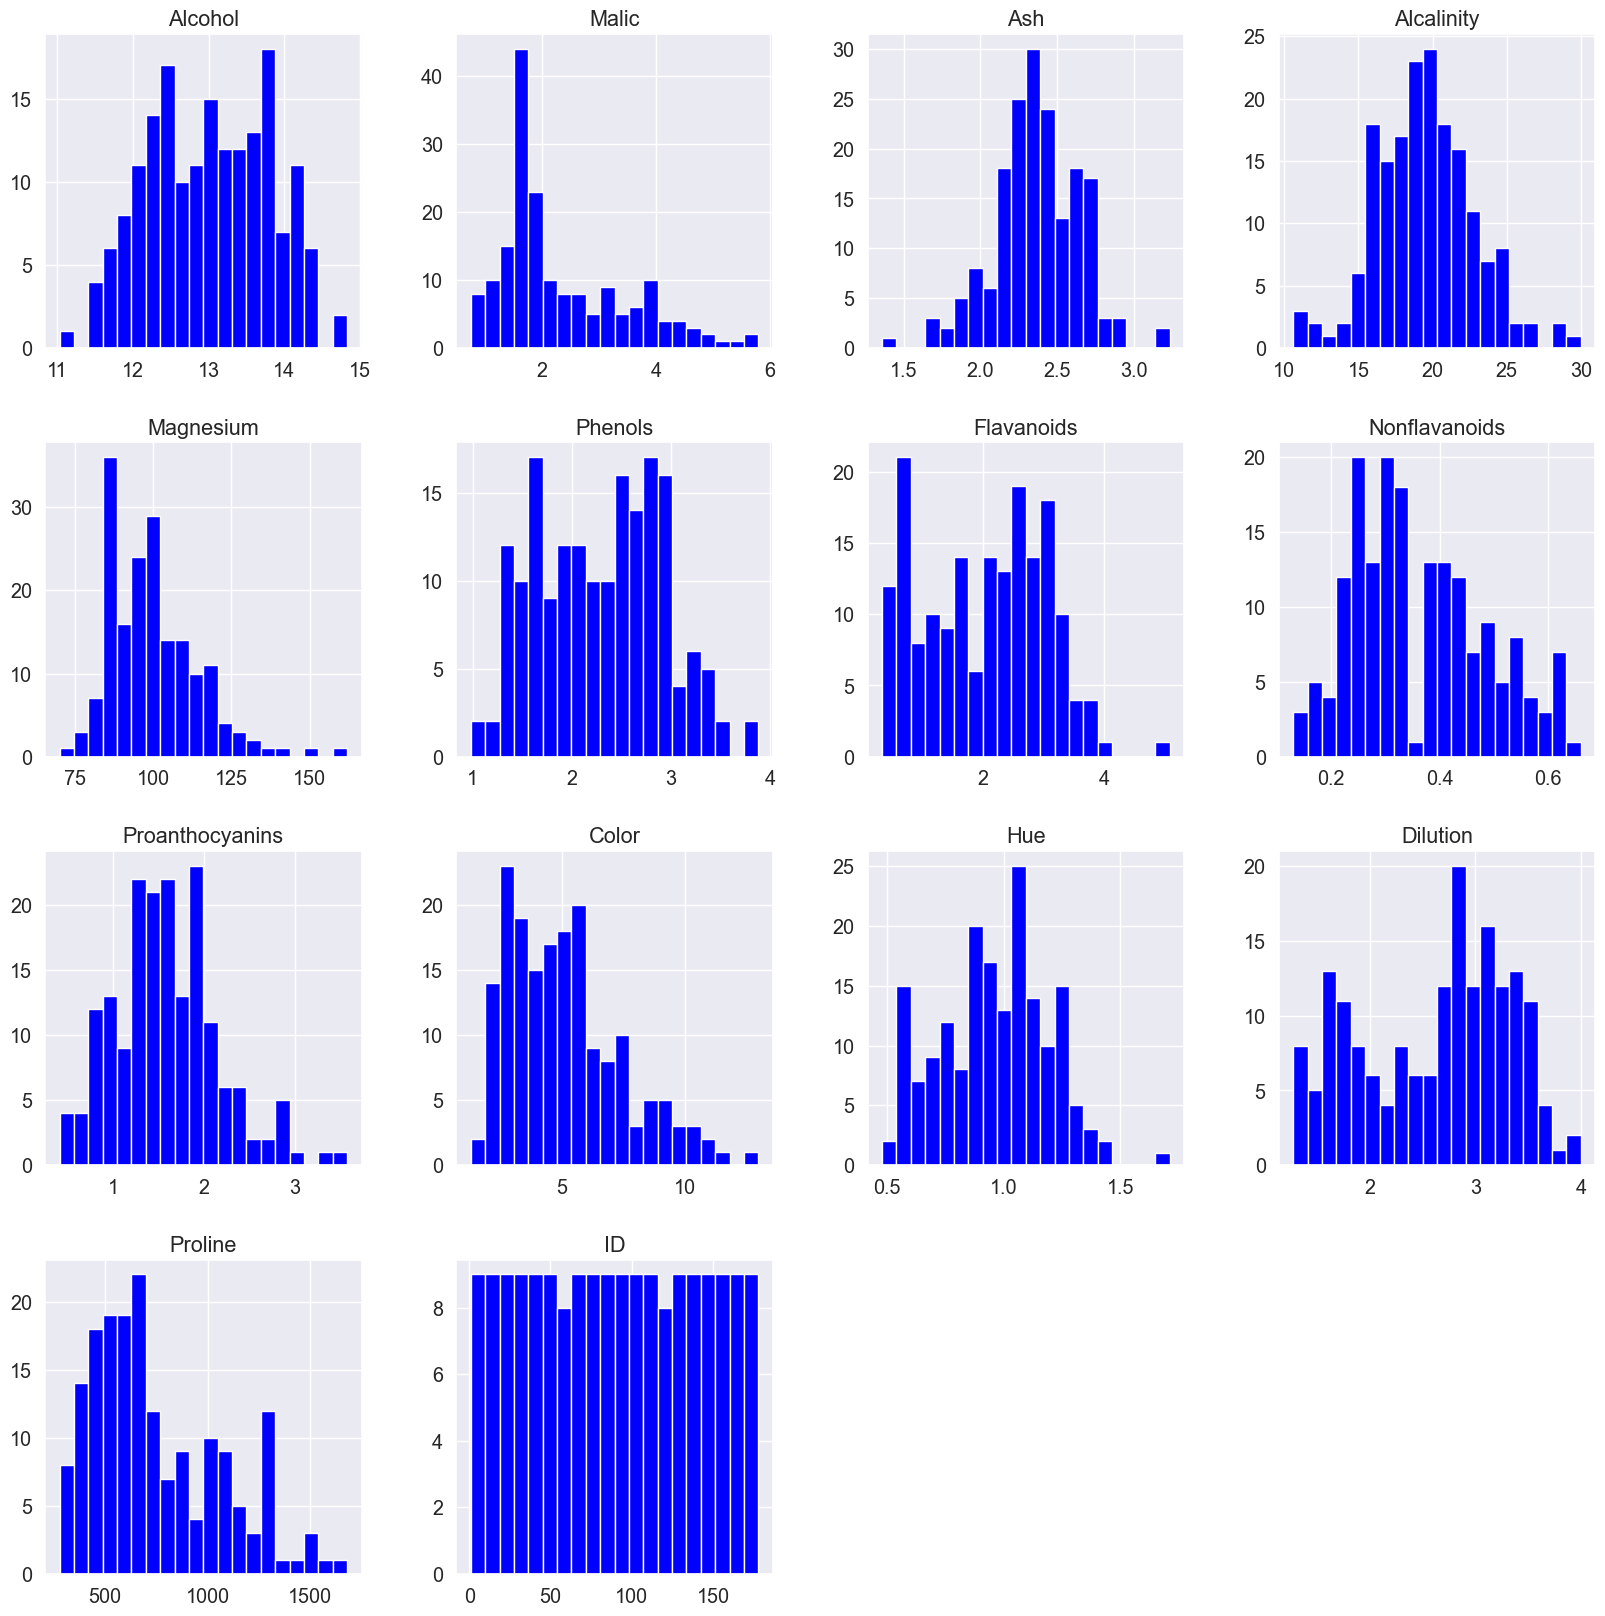

In [14]:
sns.set(style='dark',font_scale=1.3,rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue')

### Outliers Detection

In [15]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

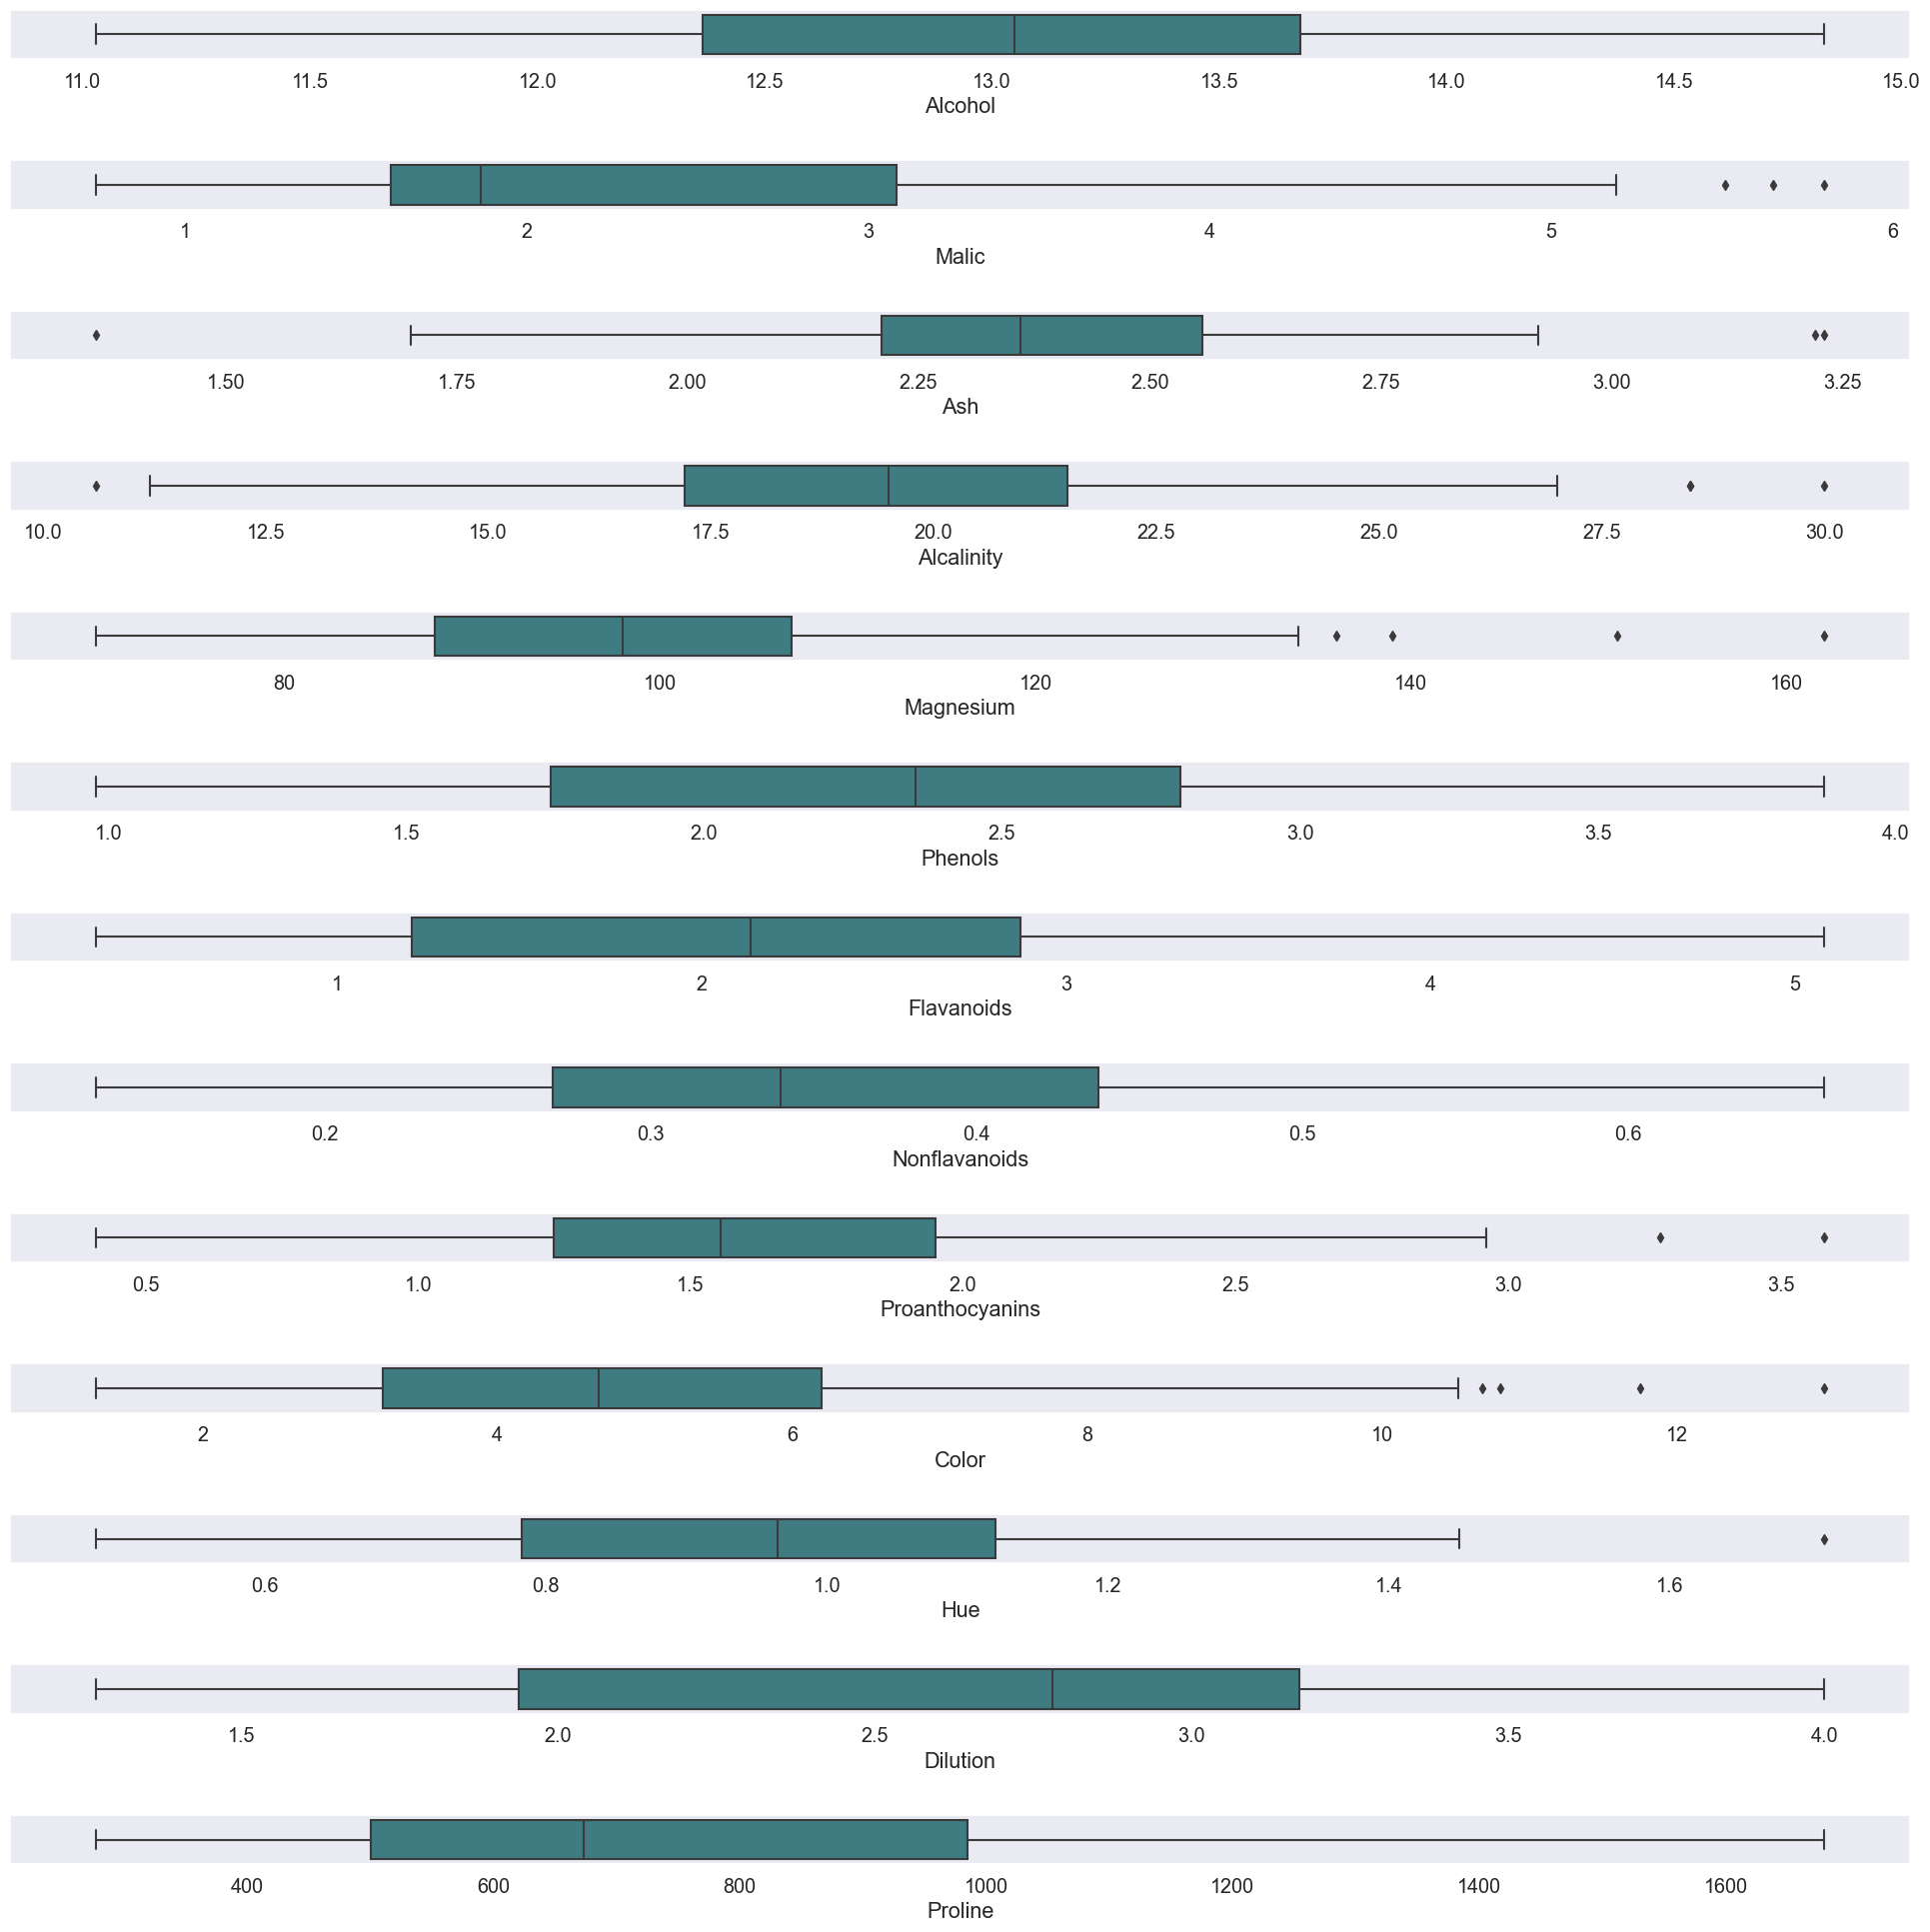

In [16]:
ot = df.copy()
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

Alcohol               Axes(0.125,0.712609;0.168478x0.167391)
Malic              Axes(0.327174,0.712609;0.168478x0.167391)
Ash                Axes(0.529348,0.712609;0.168478x0.167391)
Alcalinity         Axes(0.731522,0.712609;0.168478x0.167391)
Magnesium             Axes(0.125,0.511739;0.168478x0.167391)
Phenols            Axes(0.327174,0.511739;0.168478x0.167391)
Flavanoids         Axes(0.529348,0.511739;0.168478x0.167391)
Nonflavanoids      Axes(0.731522,0.511739;0.168478x0.167391)
Proanthocyanins        Axes(0.125,0.31087;0.168478x0.167391)
Color               Axes(0.327174,0.31087;0.168478x0.167391)
Hue                 Axes(0.529348,0.31087;0.168478x0.167391)
Dilution            Axes(0.731522,0.31087;0.168478x0.167391)
Proline                   Axes(0.125,0.11;0.168478x0.167391)
ID                     Axes(0.327174,0.11;0.168478x0.167391)
dtype: object

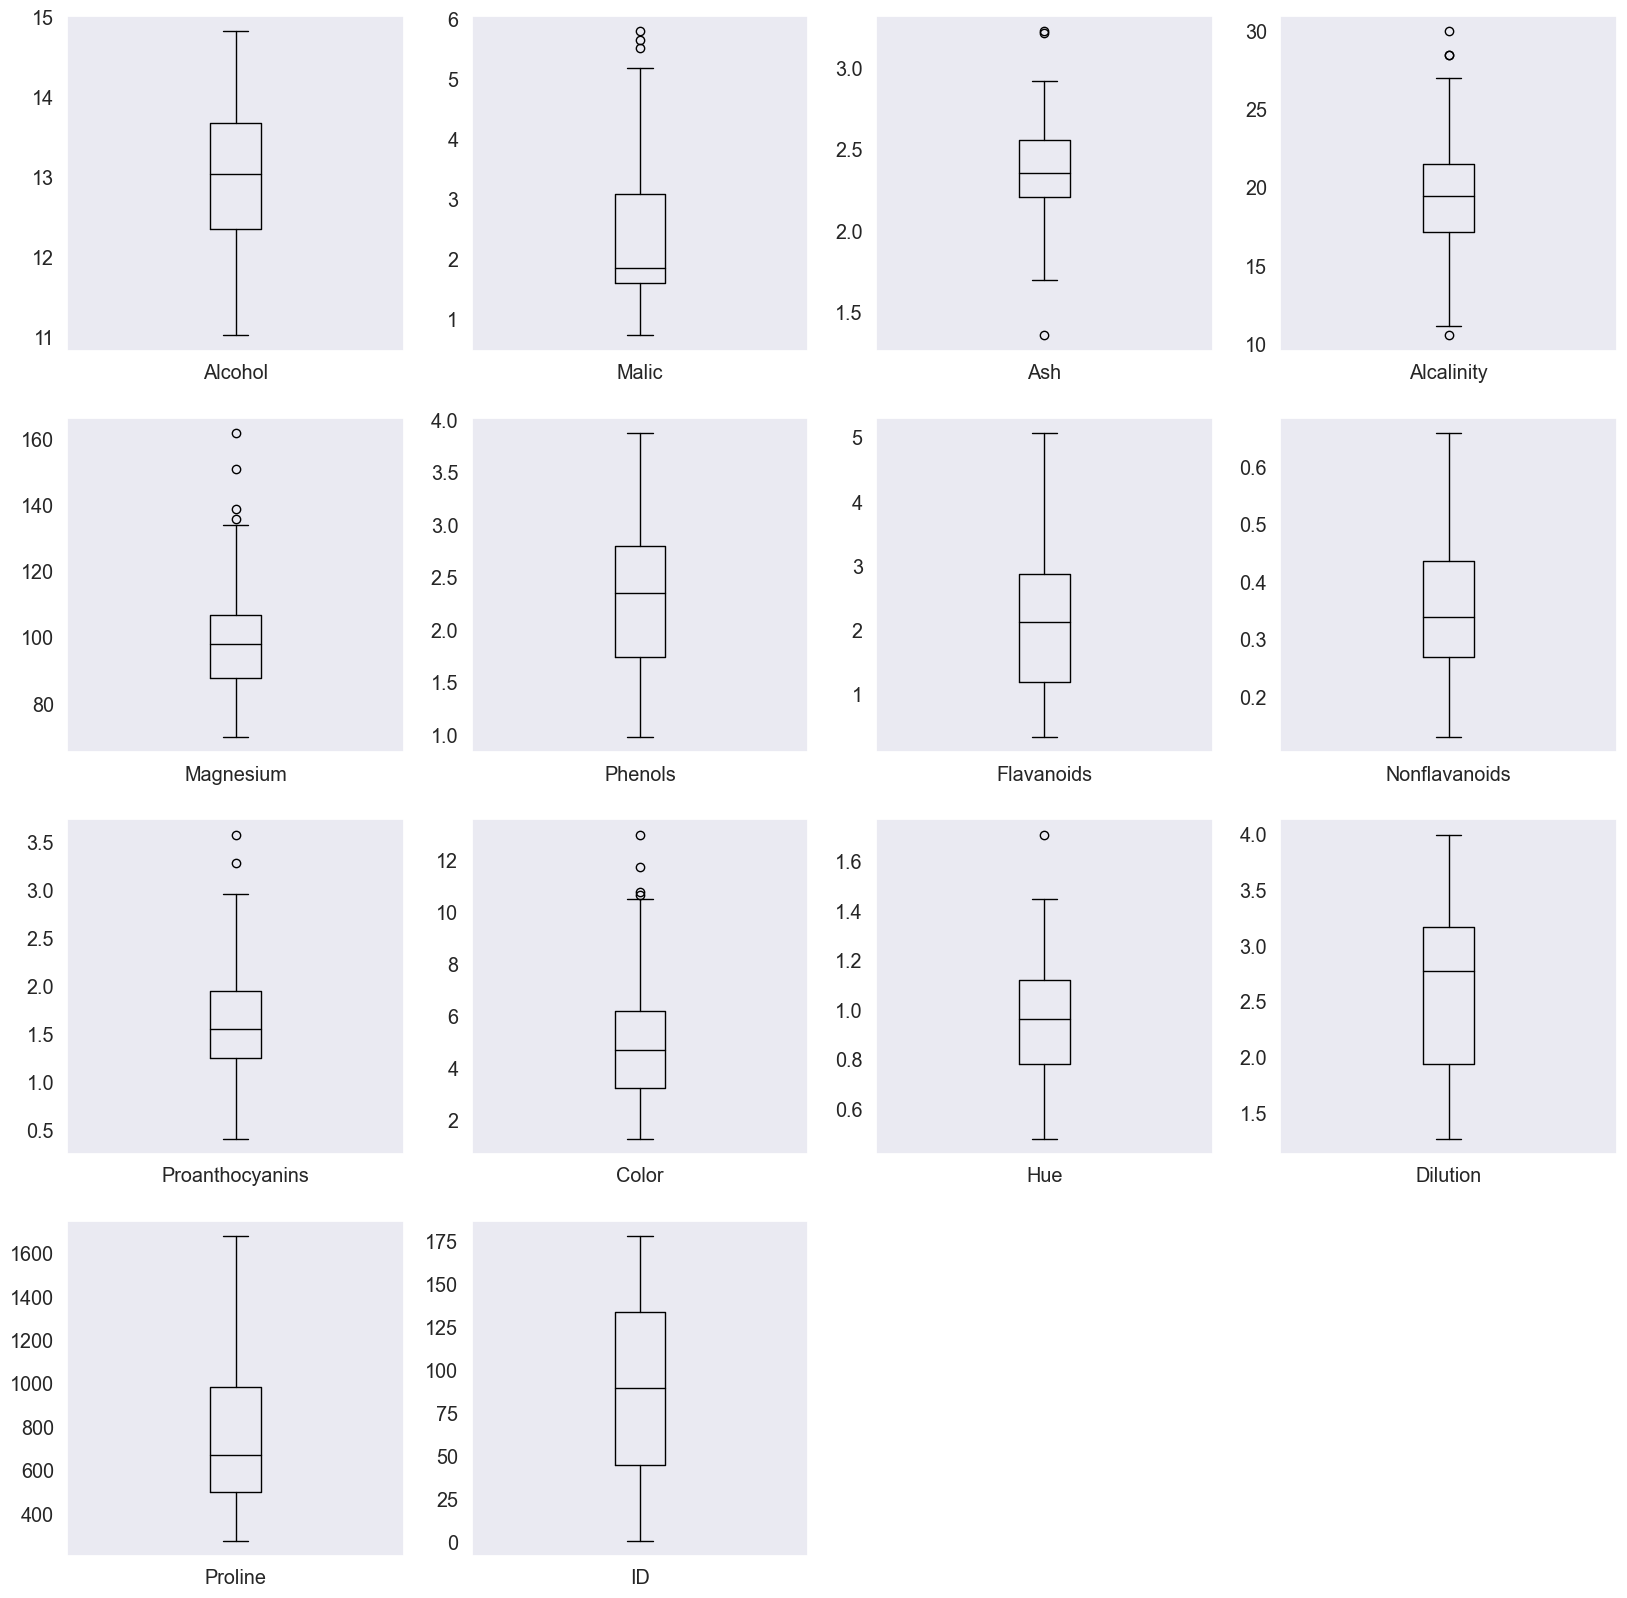

In [17]:
df.plot(kind='box',subplots=True,layout=(4,4),color='black')

### Data Visualization

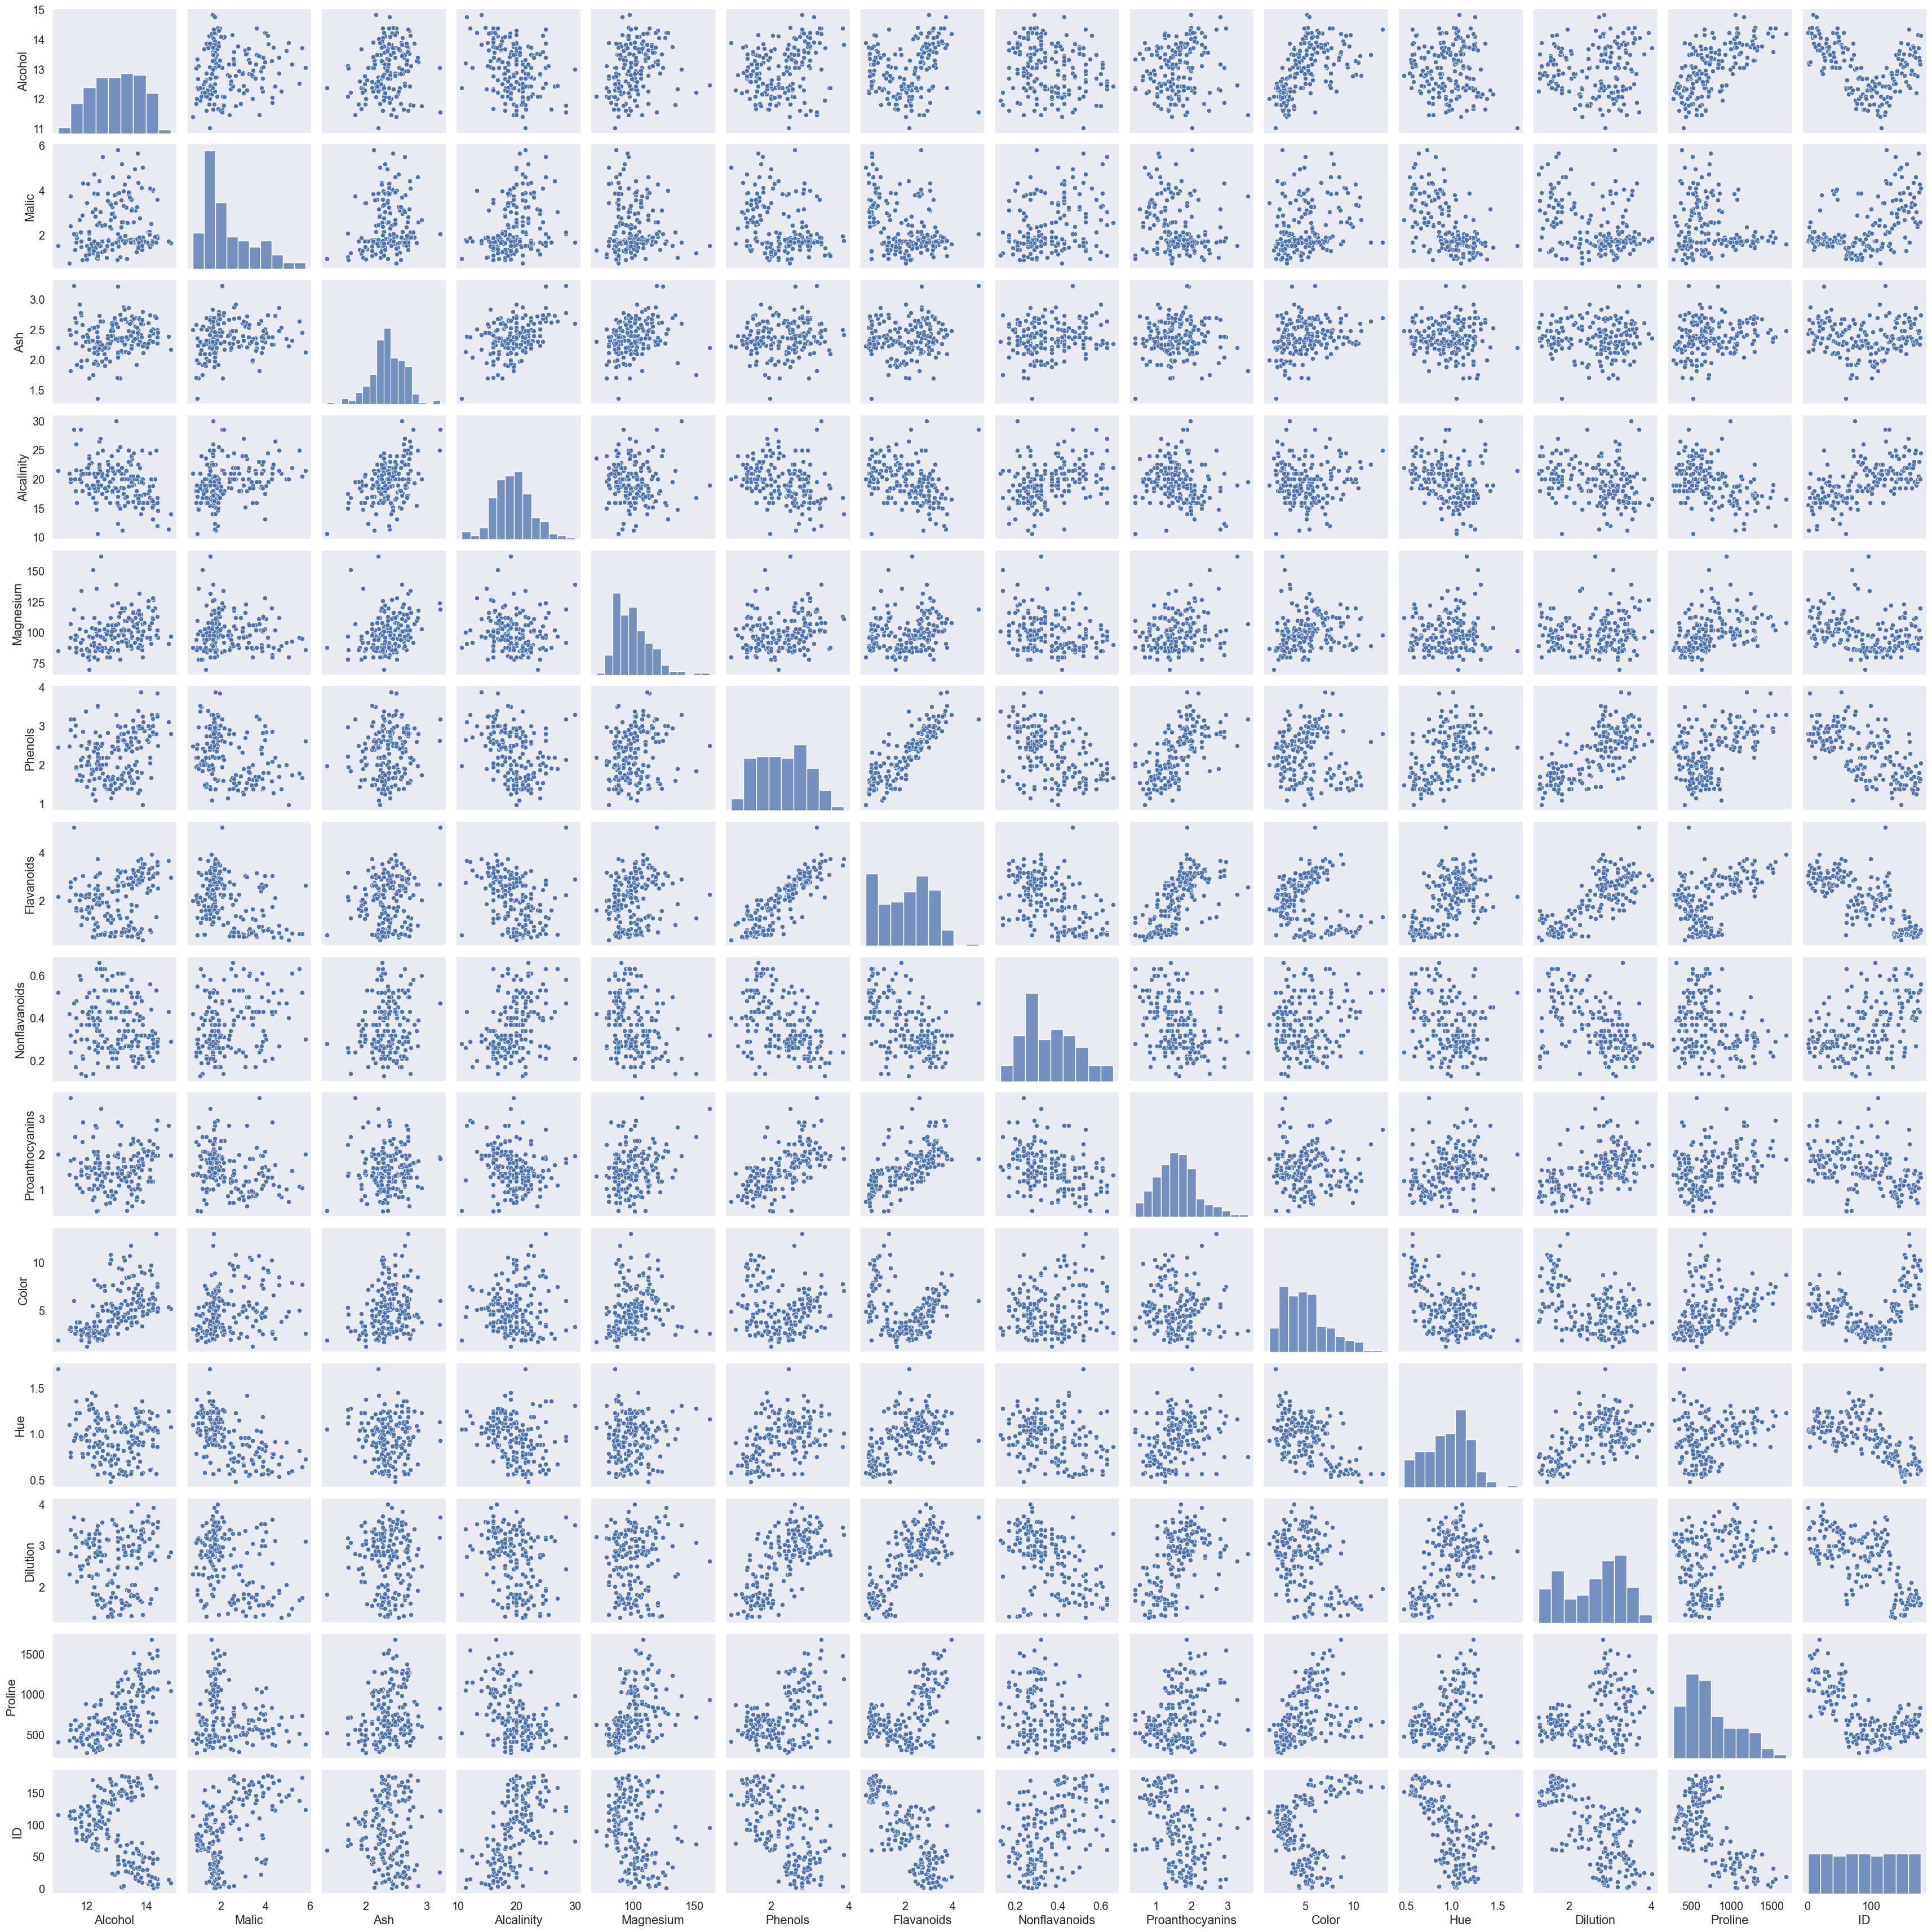

In [18]:
sns.pairplot(df)

In [19]:
# correlation heatmap
df.corr()

Alcohol     Malic       Ash  Alcalinity  Magnesium  \
Alcohol          1.000000  0.094397  0.211545   -0.310235   0.270798   
Malic            0.094397  1.000000  0.164045    0.288500  -0.054575   
Ash              0.211545  0.164045  1.000000    0.443367   0.286587   
Alcalinity      -0.310235  0.288500  0.443367    1.000000  -0.083333   
Magnesium        0.270798 -0.054575  0.286587   -0.083333   1.000000   
Phenols          0.289101 -0.335167  0.128980   -0.321113   0.214401   
Flavanoids       0.236815 -0.411007  0.115077   -0.351370   0.195784   
Nonflavanoids   -0.155929  0.292977  0.186230    0.361922  -0.256294   
Proanthocyanins  0.136698 -0.220746  0.009652   -0.197327   0.236441   
Color            0.546364  0.248985  0.258887    0.018732   0.199950   
Hue             -0.071747 -0.561296 -0.074667   -0.273955   0.055398   
Dilution         0.072343 -0.368710  0.003911   -0.276769   0.066004   
Proline          0.643720 -0.192011  0.223626   -0.440597   0.393351   
ID              -0.362844  0.487630 -0.016086    0.563955  -0.232275   

                  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  \
Alcohol          0.289101    0.236815      -0.155929         0.136698   
Malic           -0.335167   -0.411007       0.292977        -0.220746   
Ash              0.128980    0.115077       0.186230         0.009652   
Alcalinity      -0.321113   -0.351370       0.361922        -0.197327   
Magnesium        0.214401    0.195784      -0.256294         0.236441   
Phenols          1.000000    0.864564      -0.449935         0.612413   
Flavanoids       0.864564    1.000000      -0.537900         0.652692   
Nonflavanoids   -0.449935   -0.537900       1.000000        -0.365845   
Proanthocyanins  0.612413    0.652692      -0.365845         1.000000   
Color           -0.055136   -0.172379       0.139057        -0.025250   
Hue              0.433681    0.543479      -0.262640         0.295544   
Dilution         0.699949    0.787194      -0.503270         0.519067   
Proline          0.498115    0.494193      -0.311385         0.330417   
ID              -0.650084   -0.758609       0.482817        -0.406681   

                    Color       Hue  Dilution   Proline        ID  
Alcohol          0.546364 -0.071747  0.072343  0.643720 -0.362844  
Malic            0.248985 -0.561296 -0.368710 -0.192011  0.487630  
Ash              0.258887 -0.074667  0.003911  0.223626 -0.016086  
Alcalinity       0.018732 -0.273955 -0.276769 -0.440597  0.563955  
Magnesium        0.199950  0.055398  0.066004  0.393351 -0.232275  
Phenols         -0.055136  0.433681  0.699949  0.498115 -0.650084  
Flavanoids      -0.172379  0.543479  0.787194  0.494193 -0.758609  
Nonflavanoids    0.139057 -0.262640 -0.503270 -0.311385  0.482817  
Proanthocyanins -0.025250  0.295544  0.519067  0.330417 -0.406681  
Color            1.000000 -0.521813 -0.428815  0.316100  0.255444  
Hue             -0.521813  1.000000  0.565468  0.236183 -0.662205  
Dilution        -0.428815  0.565468  1.000000  0.312761 -0.697445  
Proline          0.316100  0.236183  0.312761  1.000000 -0.644330  
ID               0.255444 -0.662205 -0.697445 -0.644330  1.000000

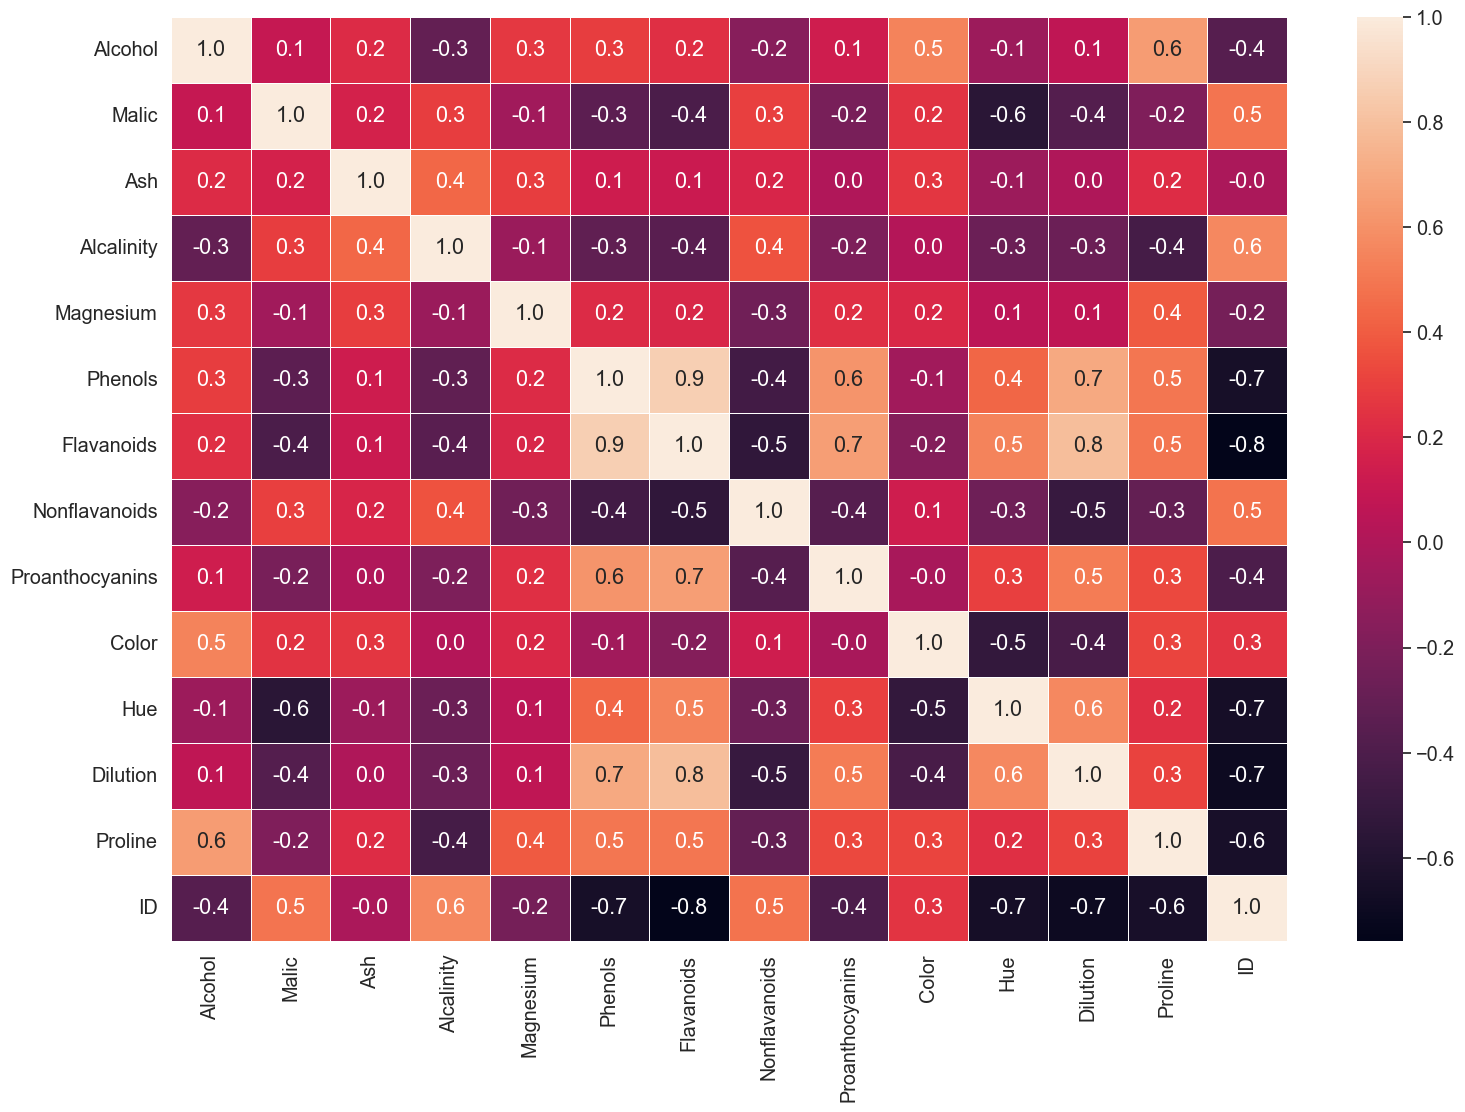

In [20]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

<b>Unique points in this correlation matrix:</b>

+ Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins
+ Flavanoids is positively correlated with Proanthocyanins and Dilution
+ Dilution is positively correlated with Hue
+ Alcohol is positively correlated with Proline

Text(0.5, 1.0, 'Data represented by the 2 strongest positively Correlated features')

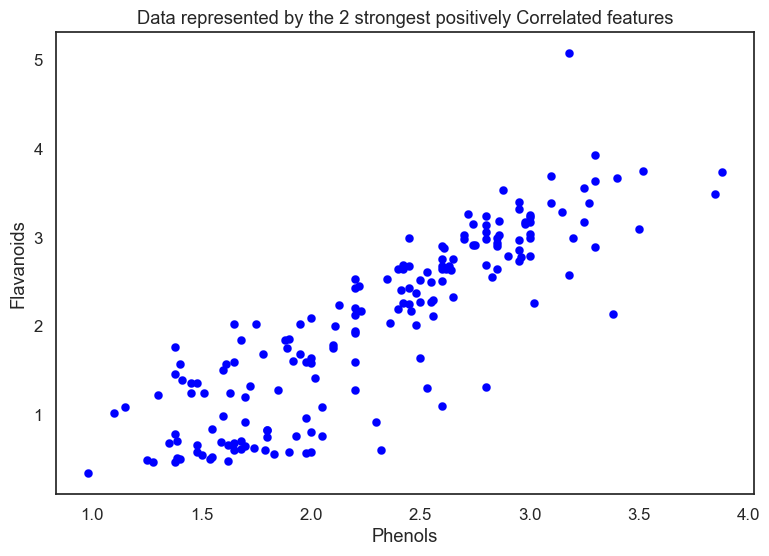

In [21]:
# Plotting frequent flying phenols vs flavanoids
sns.set(style='white',rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',)

### Data Preprocessing 

### Applying Standard Scaler on the Data

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [23]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

### Applying Minmax Scaler on Dataset 

In [24]:
# using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

## Principal Component Analysis(PCA)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca_var = PCA()
pca_var.fit(std_df)



PCA()

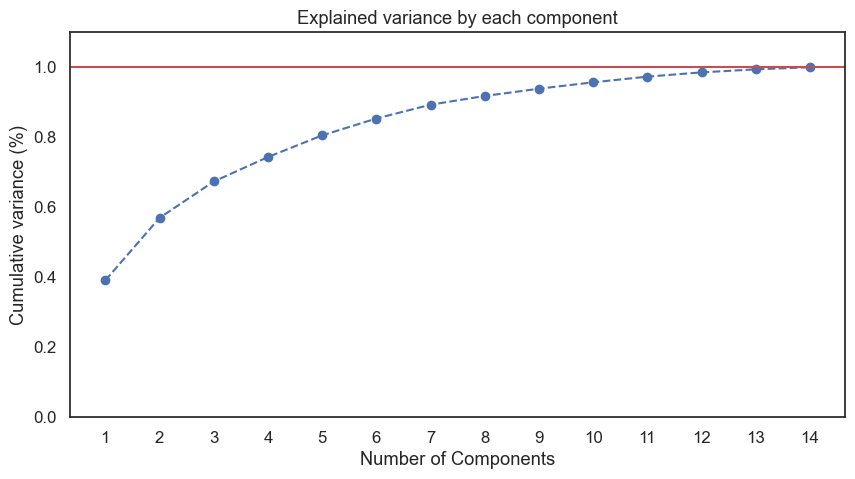

In [27]:
# PCA
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [28]:
var = pca_var.explained_variance_ratio_
var

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

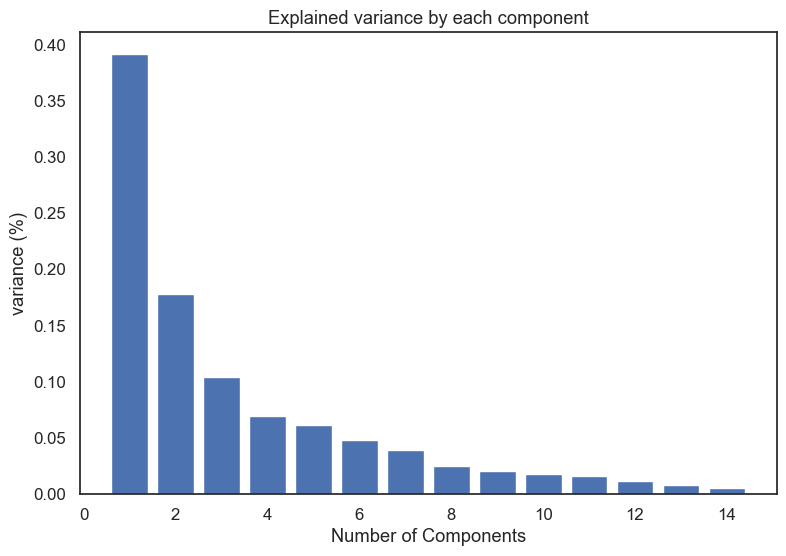

In [29]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [30]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [31]:
# PCA
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816 -1.447476 -0.153274
1  2.734987  0.334166 -2.079717
2  2.944840 -1.033583  0.979570
3  4.094144 -2.762344 -0.123541
4  1.550429 -0.867267  1.915570

### Pca on MinMax Scaled Dataset

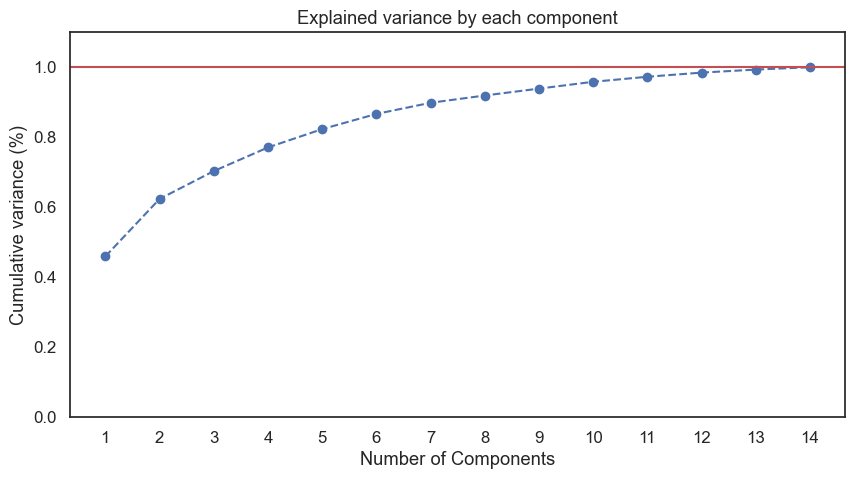

In [32]:
# PCA
pca_var = PCA()
pca_var.fit(minmax_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

#### It is interesting to see that with just 2 components we capture over 50% of the variance. And by moving up to 3 components, we get 2 thirds of the variance.

In [33]:
var = pca_var.explained_variance_ratio_
var

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

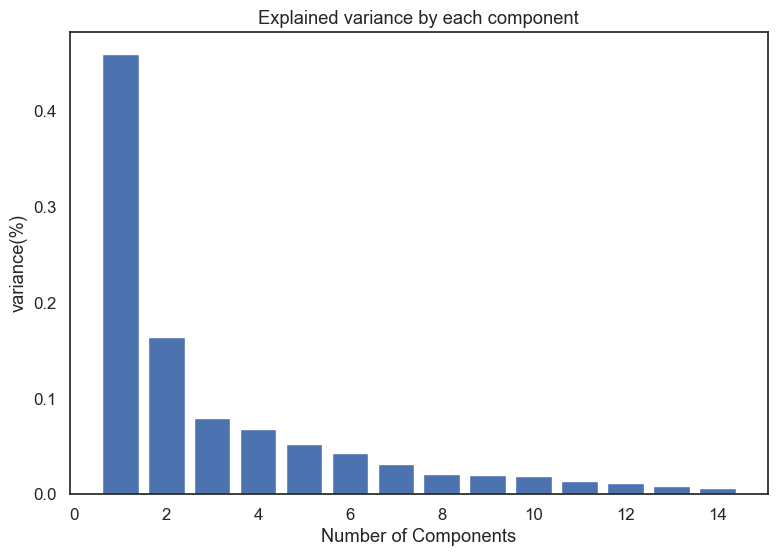

In [34]:
plt.bar(range(1,len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance(%)')
plt.title('Explained variance by each component')

In [35]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [36]:
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

#Convert to data frame 
pca_minmax_df = pd.DataFrame(data=pca_minmax,columns = ['PC1','PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0  0.864955 -0.246505  0.012715
1  0.676158 -0.011751 -0.306279
2  0.692172 -0.186686  0.139093
3  0.955057 -0.568299  0.123337
4  0.411640 -0.067685  0.118278

###  PCA plot in 2D

Text(0, 0.5, 'PC2')

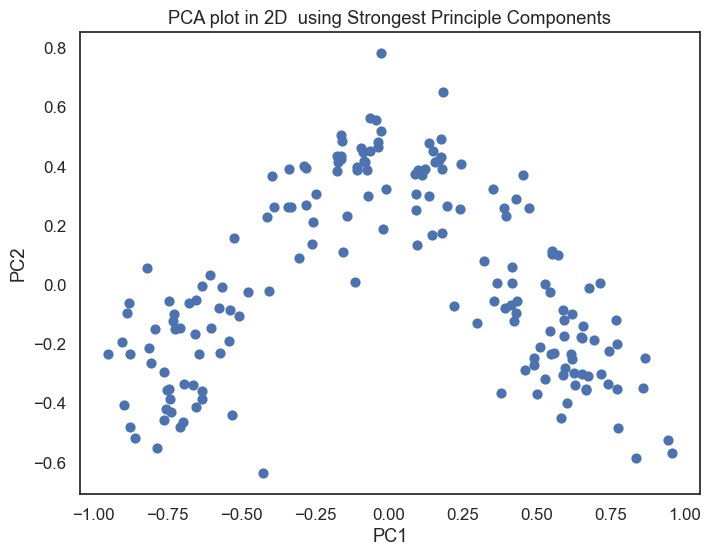

In [37]:
# figure size
plt.figure(figsize=(8,6))

#Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0],pca_minmax_df.iloc[:,1],s=40)
plt.title('PCA plot in 2D  using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')


### + We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by <b>clustering</b> the data into 3 groups using techniques such as <b>k-Means</b> and <b>Hierarchical</b>.

### KMeans Clustering

### Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset¶

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from tqdm import tqdm

In [39]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
                   init = 'k-means++',
                   n_init=15,
                   max_iter=500,
                   random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:01<00:10,  1.48s/it]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:02<00:08,  1.44s/it]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\skl

In [40]:
from sklearn.metrics import silhouette_score as sil

In [41]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:01<00:09,  1.35s/it]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:02<00:08,  1.38s/it]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\skl

#### the objects in the same cluster are similar as much as possible, and the objects in different clusters are highly distinct That is, we want the average distance within cluster to be as small as possible; and the average distance between clusters to be as large as possible.

In [42]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= sil(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.40748327911080984


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4817835370724268


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.43109240818432953


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.41489679453806727


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3837227147675391


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.30996557235673206


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.2886299672842359


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.29573468459768787


The standardized data, the ideal <b>number of clusters is 3</b>, with a score higher than other options, of <b>0.45

### Building a  KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset 

In [43]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(178,)

In [44]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [45]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [46]:
model_kmeans.cluster_centers_

array([[-3.00022931, -1.16059366, -0.23271123],
       [-0.08562687,  1.72743604,  0.24903744],
       [ 2.55325354, -0.9460415 , -0.08278602]])

In [47]:
model_kmeans.inertia_

501.1748240053777

In [48]:
data['Kmeans_label'] = model_kmeans.labels_

In [49]:
data.groupby('Kmeans_label').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
Kmeans_label                                                                   
0             2.960000  13.144000  3.346200  2.425600  21.330000   98.640000   
1             2.000000  12.246418  1.891642  2.242985  20.140299   93.238806   
2             1.032787  13.711475  1.997049  2.453770  17.281967  107.786885   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
Kmeans_label                                                                
0             1.677200   0.807000       0.45040        1.156400  7.264400   
1             2.258209   2.085672       0.36194        1.612836  3.059701   
2             2.842131   2.969180       0.28918        1.922951  5.444590   

                   Hue  Dilution      Proline          ID  
                  mean      mean         mean        mean  
Kmeans_label                                               
0             0.686200  1.698800   622.440000  152.380000  
1             1.059493  2.798507   508.597015   95.104478  
2             1.067705  3.154754  1110.639344   31.803279

### Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data<a class="anchor" id="7.4"></a>

In [50]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:01<00:08,  1.20s/it]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:02<00:07,  1.29s/it]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\skl

In [51]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    silhouette[i] = sil(pca_minmax_df, kmeans.labels_, metric='euclidean')

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:01<00:08,  1.27s/it]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:02<00:08,  1.36s/it]C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\skl

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

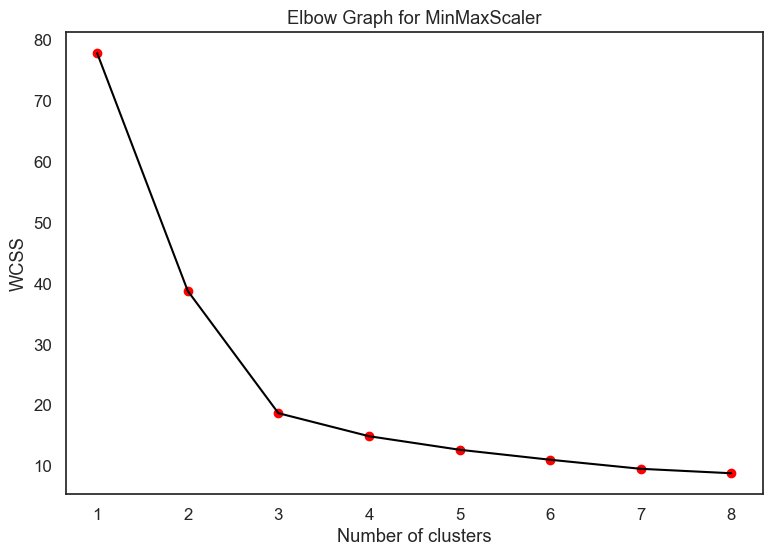

In [52]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_minmax_df)
    sil_score1= sil(pca_minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.43975041589138875


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5215335527289147


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4625268425813935


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3982593665485296


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3947108989572142


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.3289857388561523


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.31172322269137376


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.29974630784109524


#### If we check silhouette score with PCA on Normalize data kmeans model 0.52>0.47 than of PCA on Standard Scaler Dataset.

Best score always close to +1.

### Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset

In [54]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(178,)

In [55]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [56]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [57]:
model_kmeans.cluster_centers_

array([[-0.69579292, -0.23298991,  0.00190367],
       [-0.02383121,  0.35770859,  0.01239953],
       [ 0.58649203, -0.19289148, -0.01473472]])

In [58]:
model_kmeans.inertia_

18.71706192569446

In [59]:
df['Kmeans_label'] = model_kmeans.labels_

In [60]:
df.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000   98.640000  1.677200   
1             12.233333  1.905000  2.251212  20.218182   93.469697  2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              0.807000      0.450400        1.156400  7.264400  0.686200   
1              2.069091      0.363485        1.602727  3.025758  1.058576   
2              2.972581      0.288710        1.928710  5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800   622.440000  152.380000  
1             2.792727   508.696970   95.530303  
2             3.155161  1100.822581   32.370968

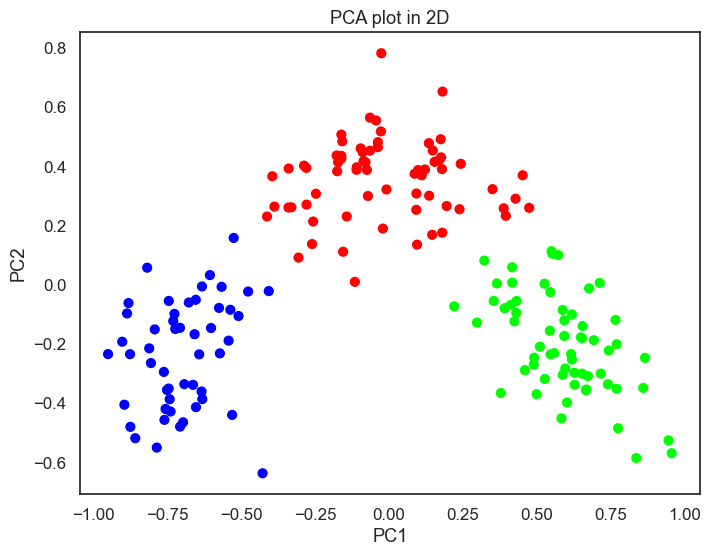

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(pca_minmax_df.iloc[:,0],pca_minmax_df.iloc[:,1],c=data['Kmeans_label'],cmap='brg',s=40)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### We can now clearly see the 3 number of clusters formed

In [62]:
df1 = data.copy()
df1['Cluster'] = model_kmeans.labels_
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])


In [63]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis =1)

In [64]:
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type                   2.9600      2.000000      1.048387
Alcohol               13.1440     12.233333     13.701774
Malic                  3.3462      1.905000      1.981129
Ash                    2.4256      2.251212      2.441613
Alcalinity            21.3300     20.218182     17.245161
Magnesium             98.6400     93.469697    107.306452
Phenols                1.6772      2.247273      2.844355
Flavanoids             0.8070      2.069091      2.972581
Nonflavanoids          0.4504      0.363485      0.288710
Proanthocyanins        1.1564      1.602727      1.928710
Color                  7.2644      3.025758      5.442258
Hue                    0.6862      1.058576      1.068548
Dilution               1.6988      2.792727      3.155161
Proline              622.4400    508.696970   1100.822581
ID                   152.3800     95.530303     32.370968
Kmeans_label           0.0000      1.000000      1.983871
Cluster                0.0000      1.000000      2.000000

### Comparing Kmeans Clusters with the Original Classified Dataset using 'Type' Feature

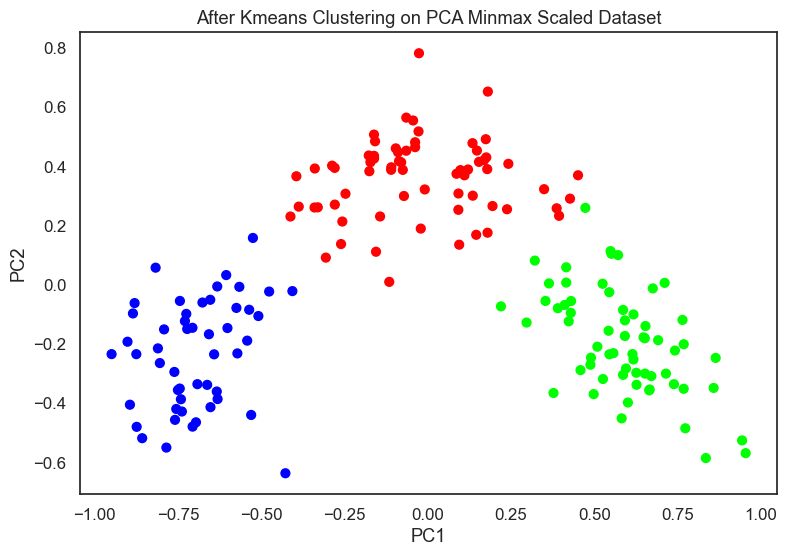

In [65]:
plt.scatter(pca_minmax_df.iloc[:,0],pca_minmax_df.iloc[:,1],c=df['Kmeans_label'],cmap='brg', s=40)

plt.title('After Kmeans Clustering on PCA Minmax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

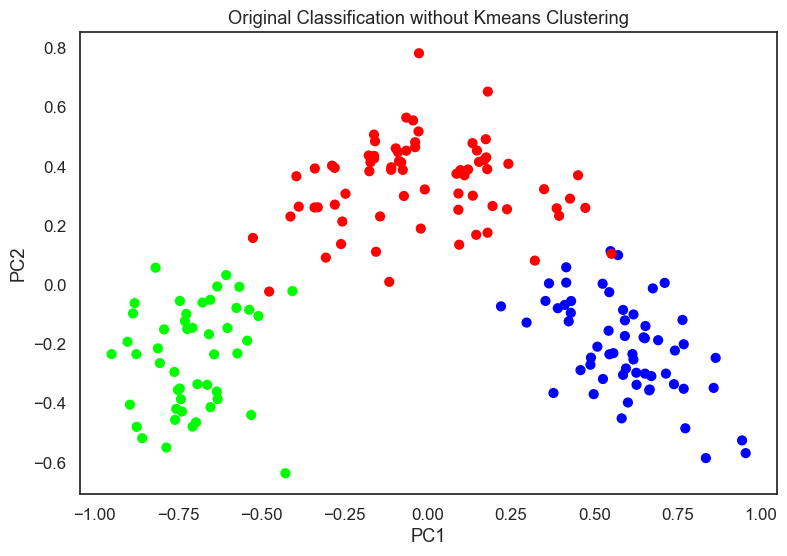

In [66]:
plt.scatter(pca_minmax_df.iloc[:,0],pca_minmax_df.iloc[:,1],c=data['Type'],cmap='brg',s=40)
plt.title('Original Classification without Kmeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### After Applying PCA and Kmeans CLustering

In [67]:
df.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000   98.640000  1.677200   
1             12.233333  1.905000  2.251212  20.218182   93.469697  2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              0.807000      0.450400        1.156400  7.264400  0.686200   
1              2.069091      0.363485        1.602727  3.025758  1.058576   
2              2.972581      0.288710        1.928710  5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800   622.440000  152.380000  
1             2.792727   508.696970   95.530303  
2             3.155161  1100.822581   32.370968

### Original Classified Dataset

In [68]:
 data.groupby('Type').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864   30.0          2.0  
2      519.507042   95.0          1.0  
3      629.895833  154.5          0.0

#### After Applying PCA and Kmeans CLustering has been perfectly clustered and rest has negliglable amount of diffrence.

### Hierarchical Clustering

In [69]:
import scipy.cluster.hierarchy as sch

In [70]:
sch.linkage(pca_minmax_df,optimal_ordering=False,method='average')

array([[6.70000000e+01, 8.50000000e+01, 2.65624556e-02, 2.00000000e+00],
       [1.50000000e+02, 1.68000000e+02, 3.09885132e-02, 2.00000000e+00],
       [1.35000000e+02, 1.54000000e+02, 3.59348086e-02, 2.00000000e+00],
       [3.00000000e+01, 5.60000000e+01, 3.86081779e-02, 2.00000000e+00],
       [1.03000000e+02, 1.13000000e+02, 4.13241521e-02, 2.00000000e+00],
       [3.50000000e+01, 4.40000000e+01, 4.16045936e-02, 2.00000000e+00],
       [8.70000000e+01, 1.16000000e+02, 4.55521136e-02, 2.00000000e+00],
       [6.40000000e+01, 1.01000000e+02, 4.62691923e-02, 2.00000000e+00],
       [1.48000000e+02, 1.51000000e+02, 4.96648120e-02, 2.00000000e+00],
       [1.47000000e+02, 1.57000000e+02, 5.15810456e-02, 2.00000000e+00],
       [2.10000000e+01, 2.50000000e+01, 5.27833264e-02, 2.00000000e+00],
       [1.53000000e+02, 1.76000000e+02, 5.38122833e-02, 2.00000000e+00],
       [4.80000000e+01, 5.70000000e+01, 5.56490042e-02, 2.00000000e+00],
       [1.45000000e+02, 1.63000000e+02, 5.57109277e

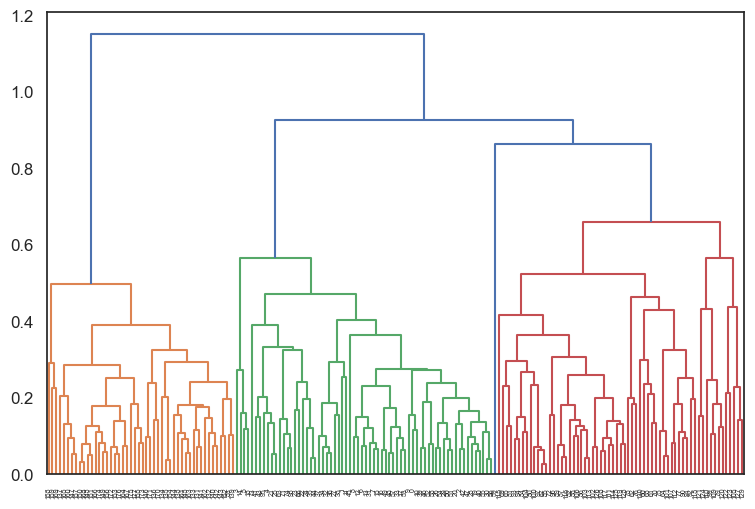

In [71]:
sch.dendrogram(sch.linkage(pca_minmax_df,optimal_ordering=False,method='average'))
plt.show()

In [72]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = sil(pca_minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4436935150655508
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4448273929121037
For n_clusters = 2 The average silhouette_score with linkage- average : 0.45988022636848075
For n_clusters = 2 The average silhouette_score with linkage- single : 0.1934738767787814

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5124784618933621
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.45525090342803287
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5163908228025498
For n_clusters = 3 The average silhouette_score with linkage- single : -0.004466488818666502

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4562664176188692
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46813138010224753
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4840694941767872

In [73]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
            silhouette_score1 = sil(pca_std_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.3437278770757191
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.2201195002910612
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.3437278770757191
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.2201195002910612
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.42467159593806825

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.3485404154932635
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.3485404154932635
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.3485404154932635
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.348540

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `a

For n_clusters = 3 The average silhouette_score with linkage- complete and Affinity- l1 : 0.46985843222003554
For n_clusters = 3 The average silhouette_score with linkage- complete and Affinity- l2 : 0.2948265432926531
For n_clusters = 3 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.46985843222003554
For n_clusters = 3 The average silhouette_score with linkage- complete and Affinity- cosine : 0.45657291055596755

For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- euclidean : 0.40255478355266916
For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- l1 : 0.40255478355266916
For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- l2 : 0.40255478355266916
For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- manhattan : 0.40255478355266916
For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- cosine : 0.4475

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `a

For n_clusters = 5 The average silhouette_score with linkage- complete and Affinity- l2 : 0.42484037852951967
For n_clusters = 5 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.4045361517848275
For n_clusters = 5 The average silhouette_score with linkage- complete and Affinity- cosine : 0.3999952583023295

For n_clusters = 5 The average silhouette_score with linkage- average and Affinity- euclidean : 0.4642033311560516
For n_clusters = 5 The average silhouette_score with linkage- average and Affinity- l1 : 0.4642033311560516
For n_clusters = 5 The average silhouette_score with linkage- average and Affinity- l2 : 0.4642033311560516
For n_clusters = 5 The average silhouette_score with linkage- average and Affinity- manhattan : 0.4642033311560516
For n_clusters = 5 The average silhouette_score with linkage- average and Affinity- cosine : 0.3652546086401945

For n_clusters = 5 The average silhouette_score with linkage- single and Affinity- euclidean : 0.0143

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `a

For n_clusters = 6 The average silhouette_score with linkage- average and Affinity- cosine : 0.3834138738036755

For n_clusters = 6 The average silhouette_score with linkage- single and Affinity- euclidean : -0.11479186468085048
For n_clusters = 6 The average silhouette_score with linkage- single and Affinity- l1 : -0.11479186468085048
For n_clusters = 6 The average silhouette_score with linkage- single and Affinity- l2 : -0.11479186468085048
For n_clusters = 6 The average silhouette_score with linkage- single and Affinity- manhattan : -0.11479186468085048
For n_clusters = 6 The average silhouette_score with linkage- single and Affinity- cosine : 0.3405058099100695

For n_clusters = 7 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.3500067609969514
For n_clusters = 7 The average silhouette_score with linkage- complete and Affinity- l1 : 0.33927193583707543
For n_clusters = 7 The average silhouette_score with linkage- complete and Affinity- l2 : 0.3500067

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `a

For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- l2 : 0.2970813766236414
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.2110448771730967
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- cosine : 0.3266254220336492

For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- euclidean : 0.2766856245735305
For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- l1 : 0.2953908789045308
For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- l2 : 0.2766856245735305
For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- manhattan : 0.2953908789045308
For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- cosine : 0.3085927465713963

For n_clusters = 8 The average silhouette_score with linkage- single and Affinity- euclidean : -0.1814

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `a

#### As we can see that Max Score is with cluster numbers 4 in Standard Sclaer Transformation 

 ### Applying Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data 

In [74]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', metric= 'l1' )
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [75]:
agg_clustering.n_clusters_

4

In [76]:
(sil(pca_std_df,agg_clustering.labels_)*100).round(3)

47.312

### Putting Cluster lables into original dataset And analysis of the same

In [77]:
df['Hierarchical_labels']=agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0           0.28             2.29   5.64  1.04      3.92     1065   1   
1           0.26             1.28   4.38  1.05      3.40     1050   2   
2           0.30             2.81   5.68  1.03      3.17     1185   3   
3           0.24             2.18   7.80  0.86      3.45     1480   4   
4           0.39             1.82   4.32  1.04      2.93      735   5   

   Kmeans_label  Hierarchical_labels  
0             2                    1  
1             2                    1  
2             2                    1  
3             2                    1  
4             2                    1

In [78]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548   92.000000   
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417   98.541667   
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419   1.959194      0.370645        1.529516   
1                    2.821385   2.942154      0.283077        1.946923   
2                    1.681667   0.788542      0.455833        1.167708   
3                    3.036667   3.550000      0.383333        1.916667   

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000   497.564516   97.403226   
1                    5.378308  1.070308  3.124308  1072.276923   35.400000   
2                    7.410833  0.684375  1.698542   627.500000  153.520833   
3                    4.310000  1.123333  3.463333   760.000000   74.000000   

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                       0.967742  
1                       1.923077  
2                       0.000000  
3                       1.666667

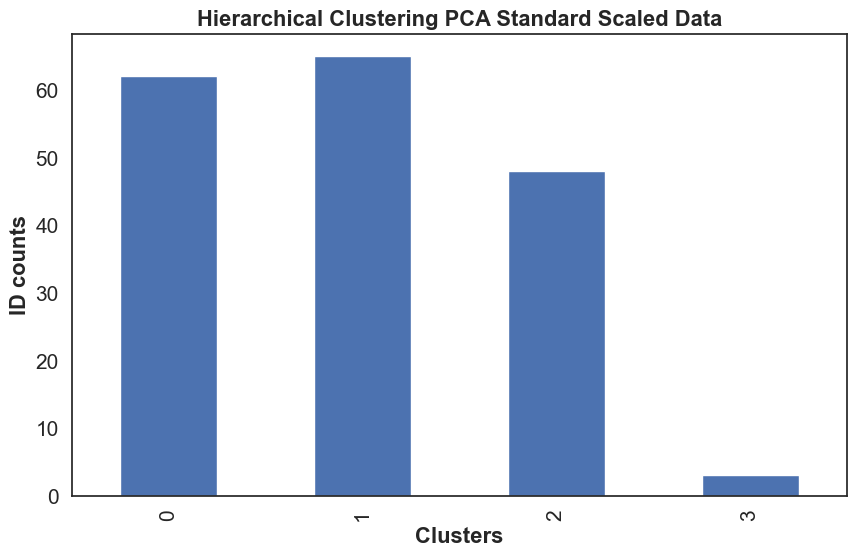

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

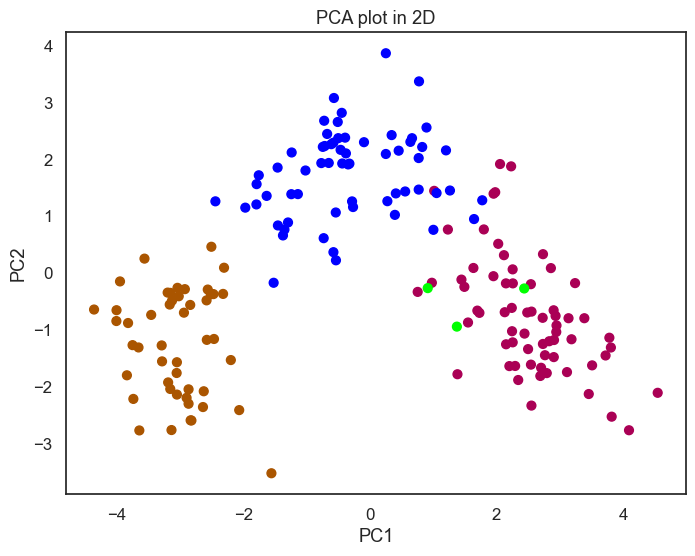

In [80]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Comparing Hierarchical Clusters with the Original Classified Dataset using 'Type' Feature

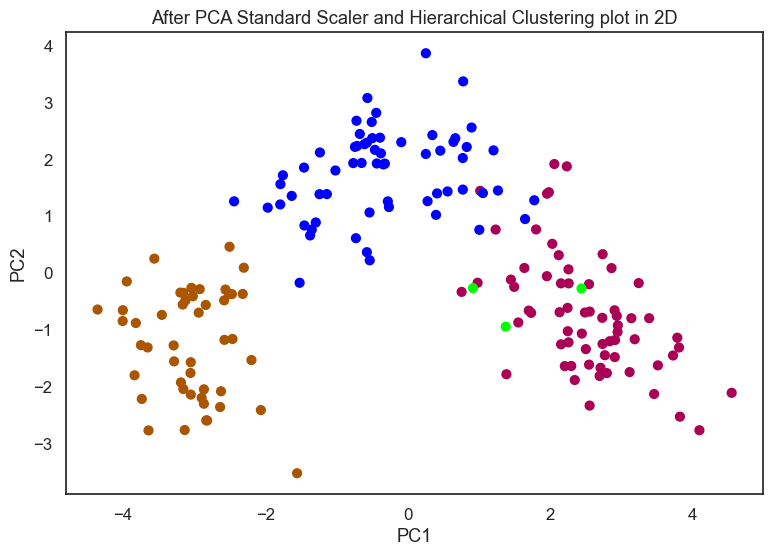

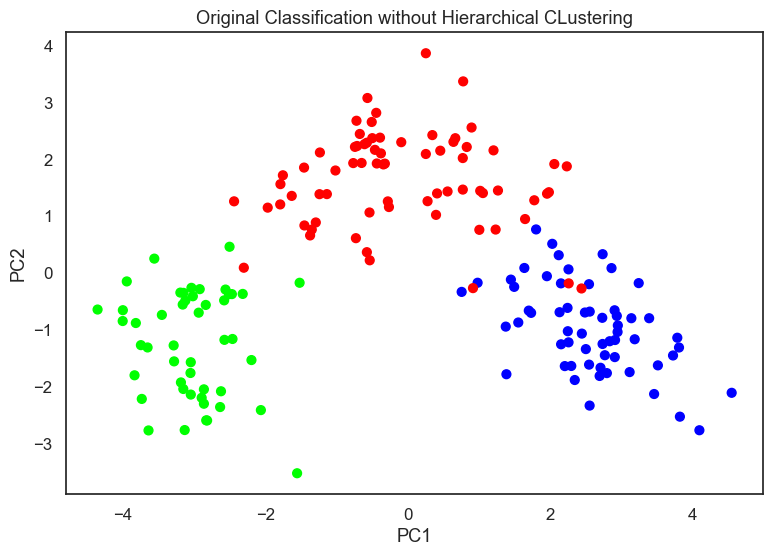

In [81]:
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### As you can see the most of the data is in the first three clusters and very little amount of data in the last cluster so it must been that clusters are overlapping or may be that the data belonging to clusters may be wrong/incorrect.

### Applying Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data 

In [82]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', metric='l2')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [83]:
agg_clustering.n_clusters_

3

In [84]:
(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

51.639

In [100]:
data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   Hierarchical_labels  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2

In [101]:
data.groupby('Hierarchical_labels').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.015625  12.226094  1.964219  2.244531  20.076563   
1                    2.979167  13.157708  3.386042  2.437083  21.510417   
2                    1.106061  13.637424  1.933788  2.433485  17.465152   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                     93.890625  2.157969   1.987656      0.372812   
1                     98.541667  1.681667   0.788542      0.455833   
2                    106.287879  2.874242   2.971970      0.282879   

                    Proanthocyanins     Color       Hue  Dilution      Proline  
                               mean      mean      mean      mean         mean  
Hierarchical_labels                                                             
0                          1.565781  2.994687  1.042437  2.746875   503.125000  
1                          1.167708  7.410833  0.684375  1.698542   627.500000  
2                          1.923030  5.347879  1.073636  3.144697  1070.106061

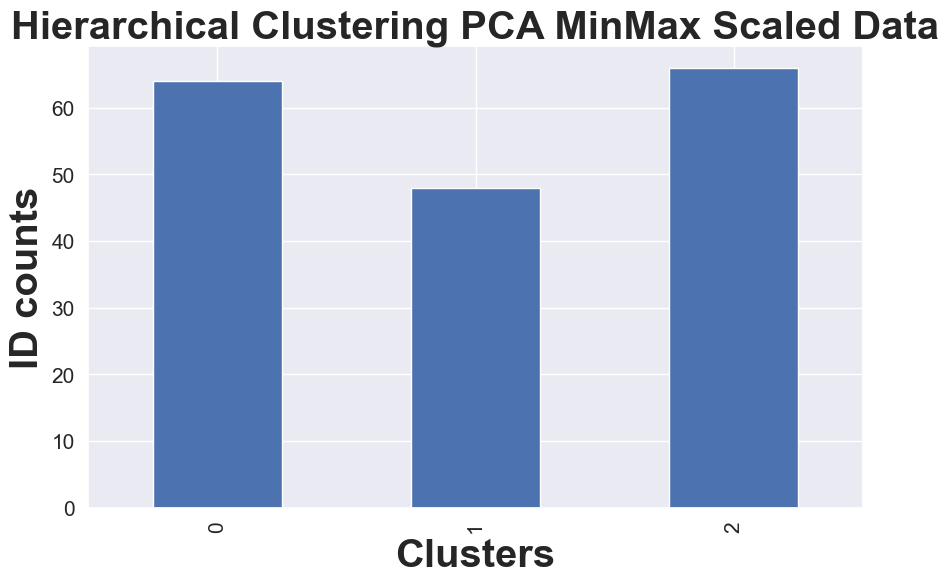

In [104]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

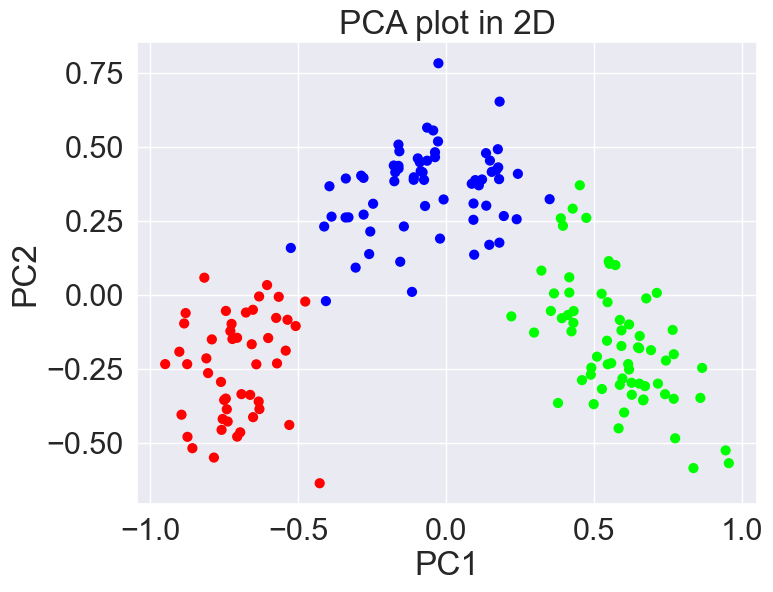

In [105]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [106]:
df1 = data.copy()
df1.rename({"Hierarchical_labels":'Cluster'}, axis=1,inplace=True)



In [107]:
df1.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Cluster  ID  
0           0.28             2.29   5.64  1.04      3.92     1065        2   1  
1           0.26             1.28   4.38  1.05      3.40     1050        2   2  
2           0.30             2.81   5.68  1.03      3.17     1185        2   3  
3           0.24             2.18   7.80  0.86      3.45     1480        2   4  
4           0.39             1.82   4.32  1.04      2.93      735        2   5

In [108]:
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [109]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type                 2.015625      2.979167      1.106061
Alcohol             12.226094     13.157708     13.637424
Malic                1.964219      3.386042      1.933788
Ash                  2.244531      2.437083      2.433485
Alcalinity          20.076563     21.510417     17.465152
Magnesium           93.890625     98.541667    106.287879
Phenols              2.157969      1.681667      2.874242
Flavanoids           1.987656      0.788542      2.971970
Nonflavanoids        0.372812      0.455833      0.282879
Proanthocyanins      1.565781      1.167708      1.923030
Color                2.994688      7.410833      5.347879
Hue                  1.042438      0.684375      1.073636
Dilution             2.746875      1.698542      3.144697
Proline            503.125000    627.500000   1070.106061
Cluster              0.000000      1.000000      2.000000
ID                  97.578125    153.520833     35.106061

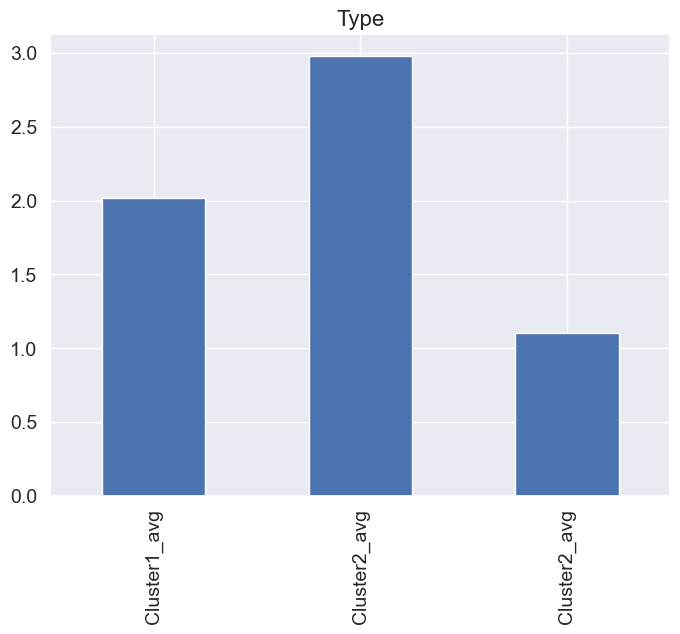

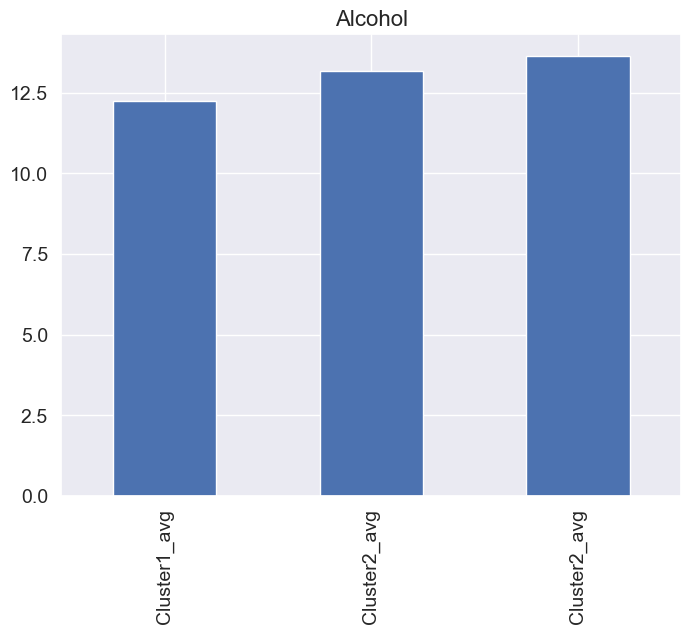

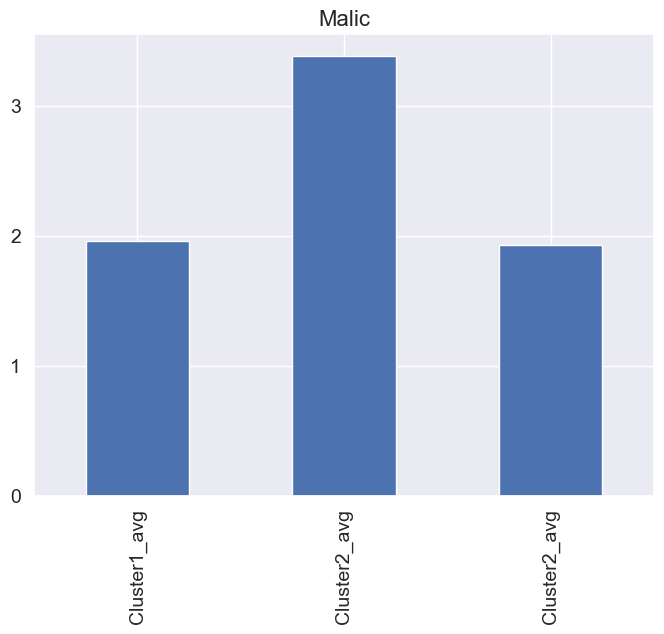

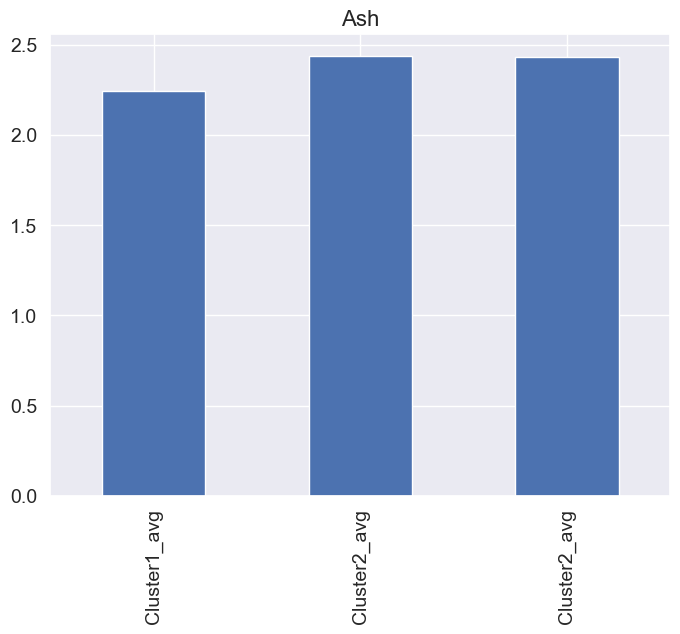

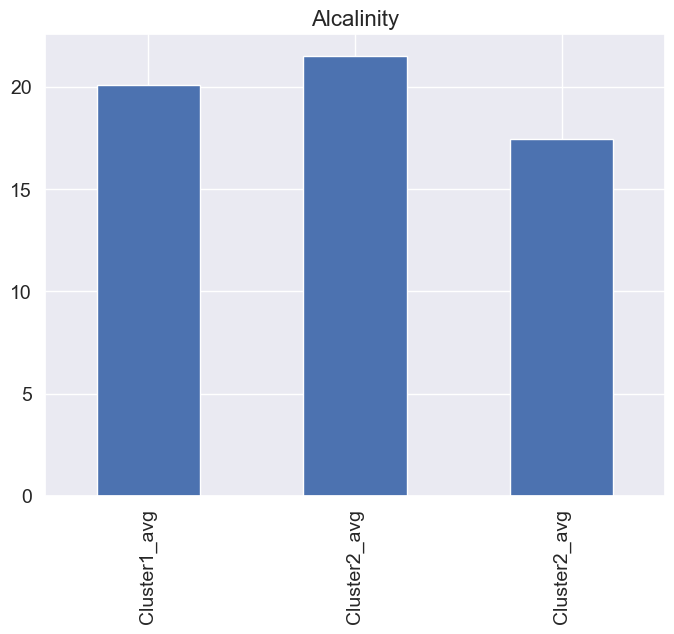

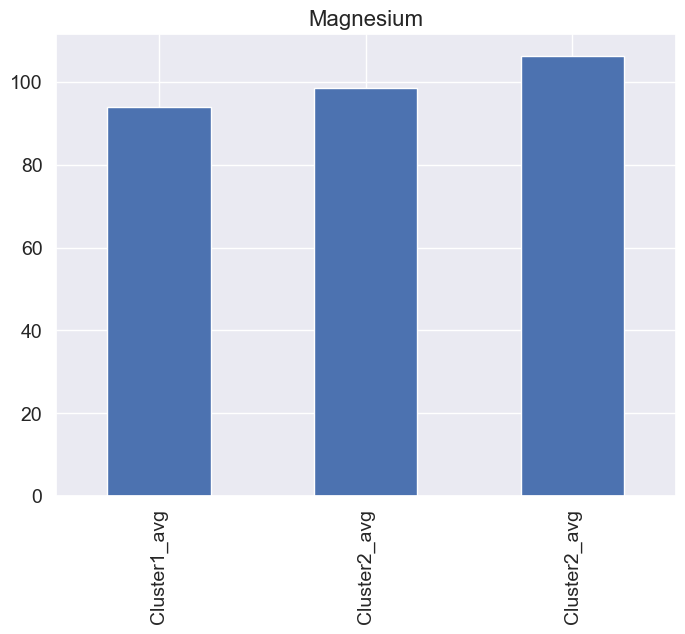

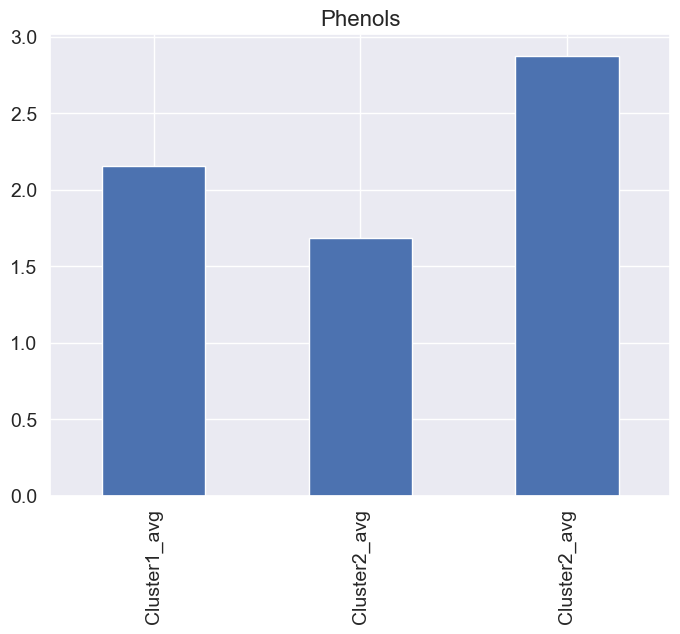

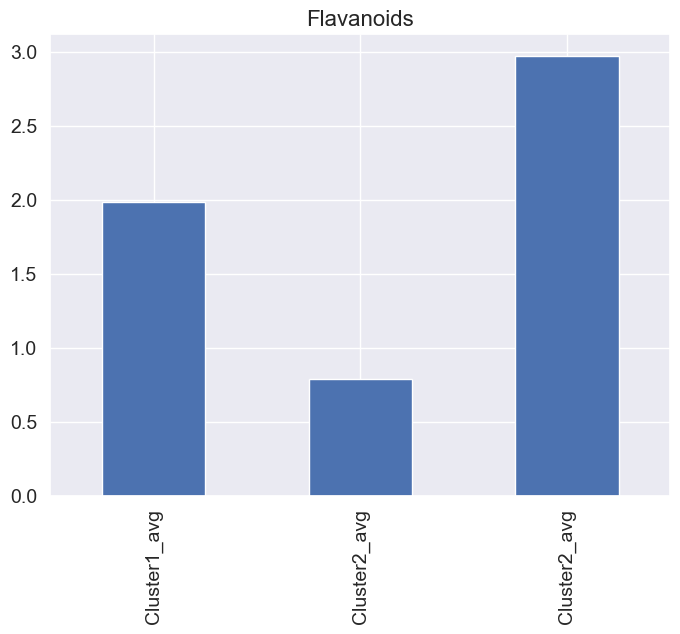

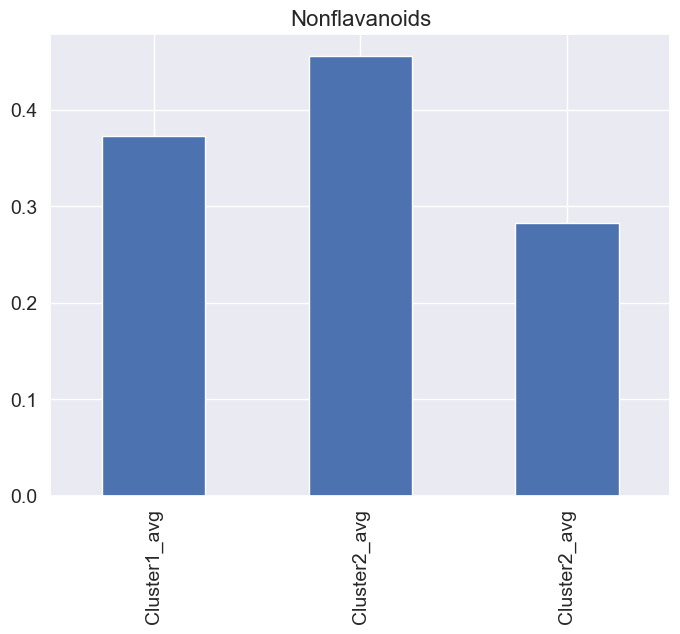

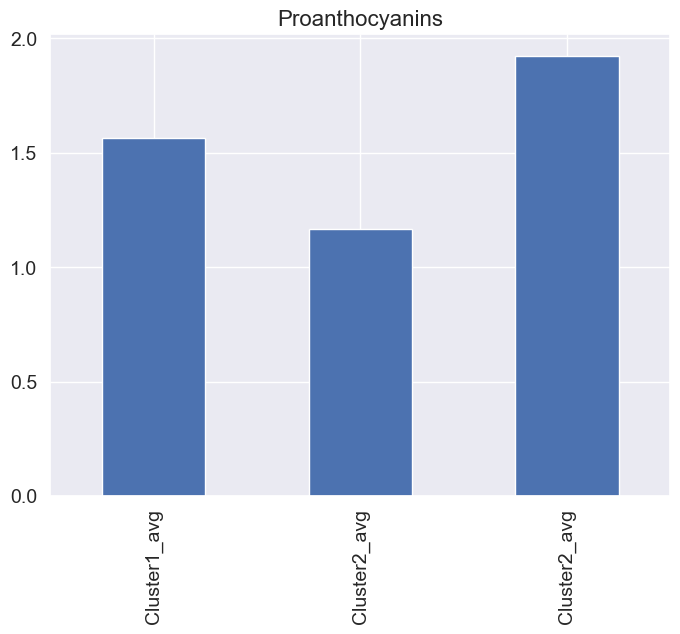

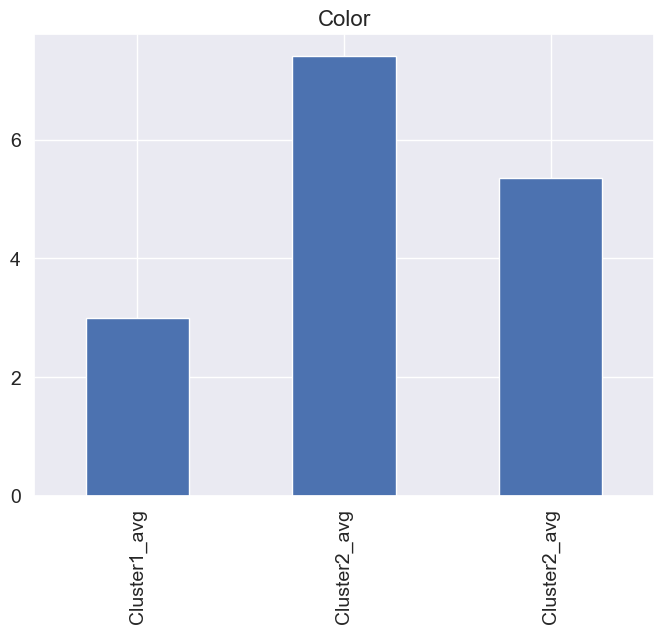

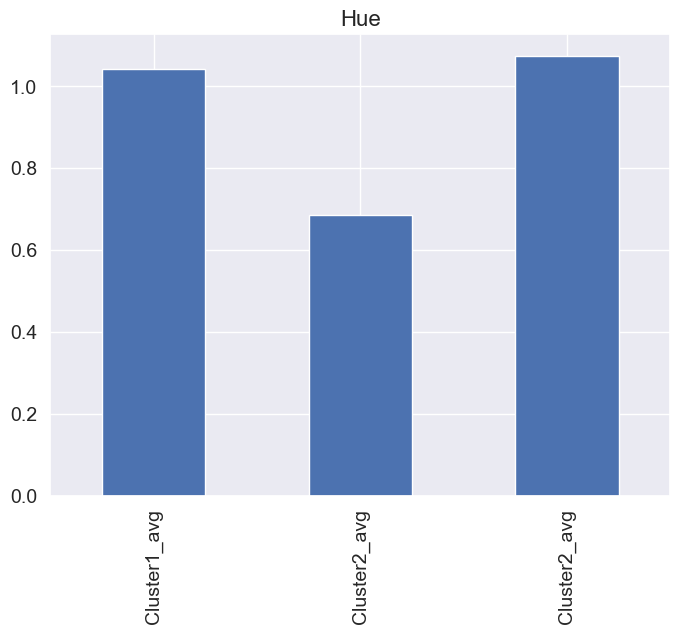

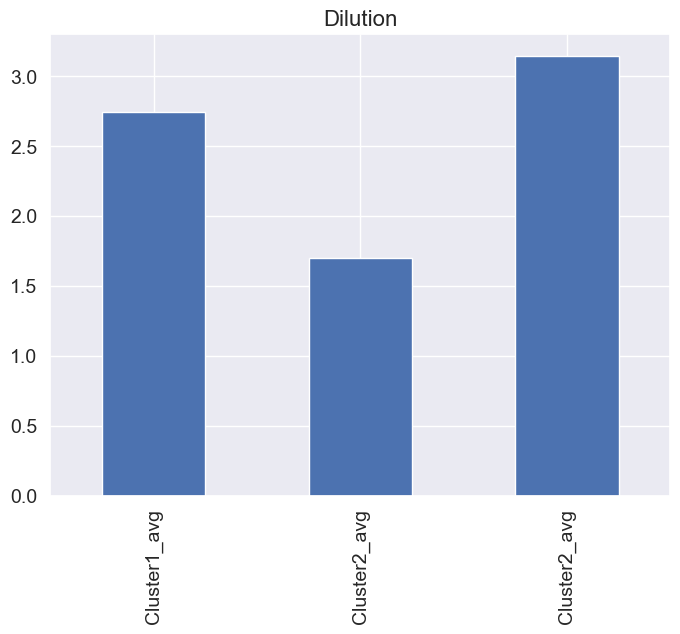

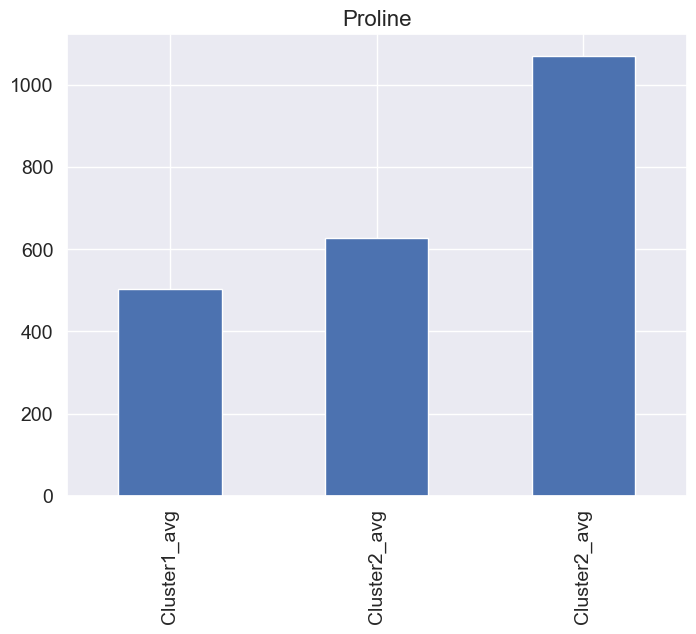

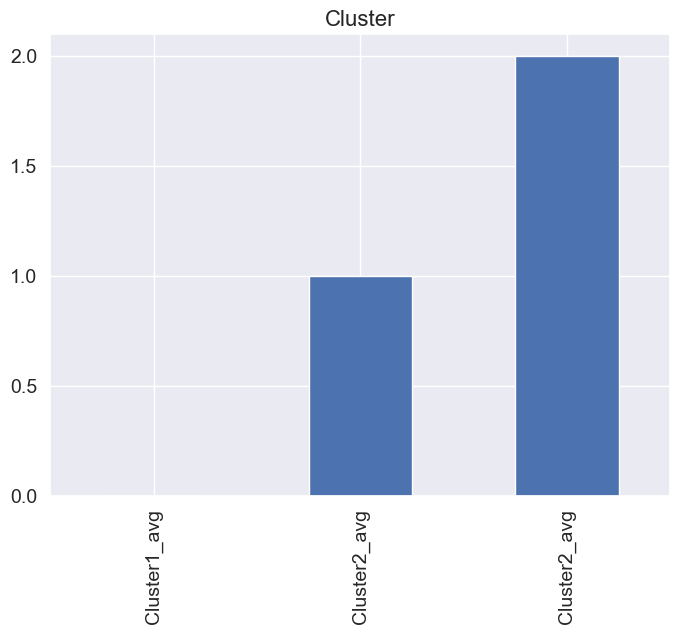

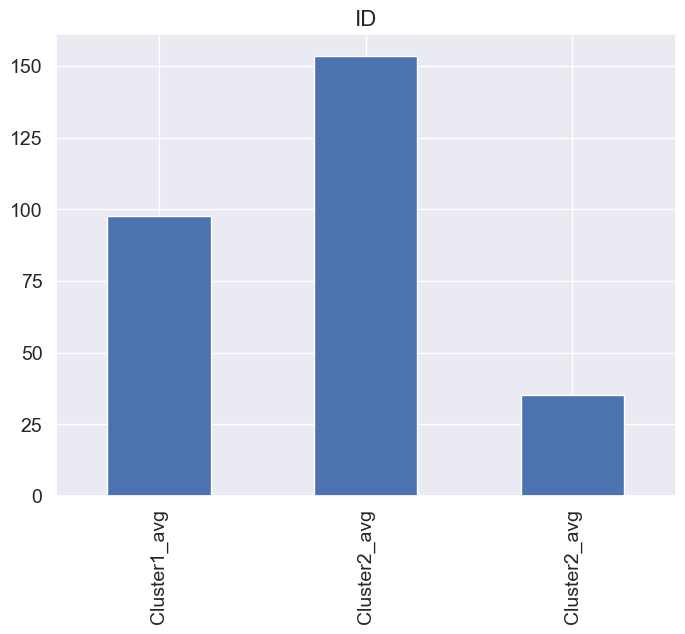

In [110]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

### Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

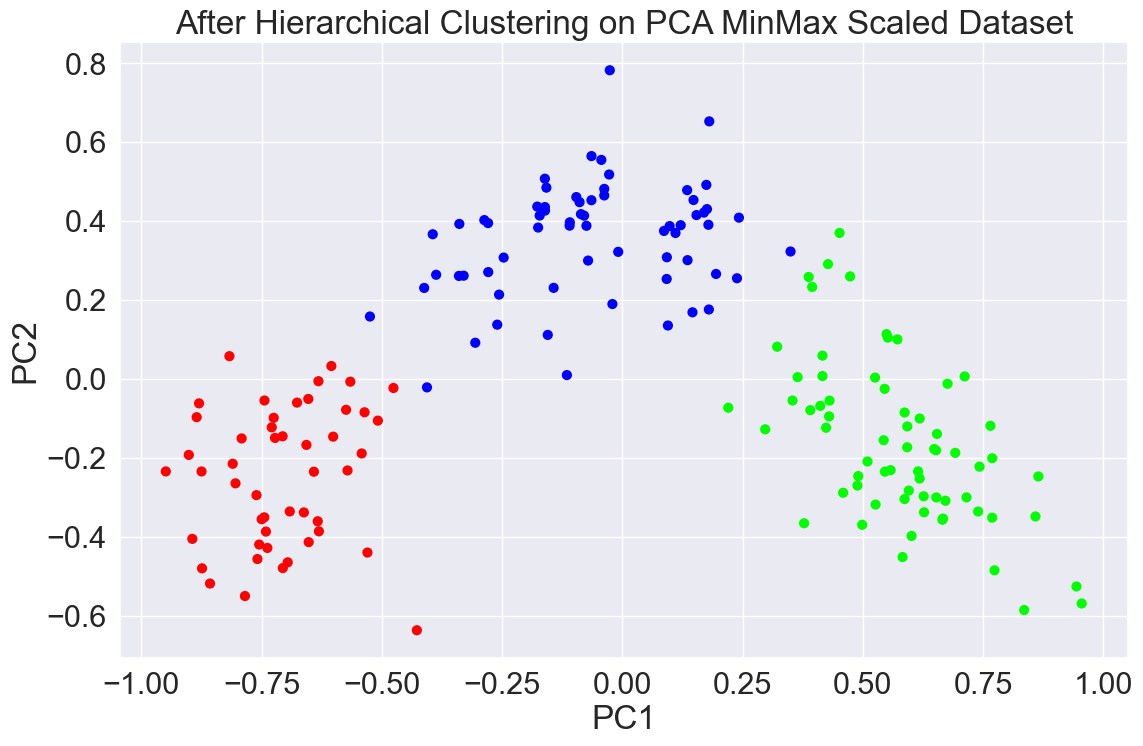

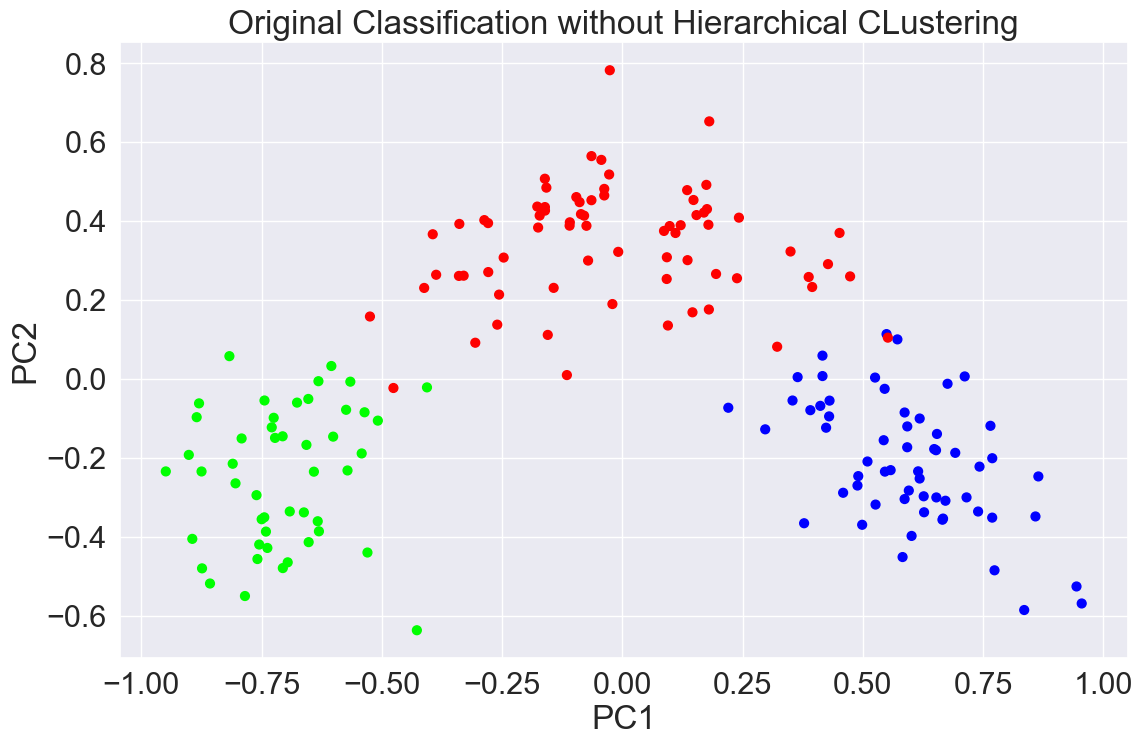

In [111]:
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [112]:
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563   93.890625   
1                    13.157708  3.386042  2.437083  21.510417   98.541667   
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969   1.987656      0.372812        1.565781   
1                    1.681667   0.788542      0.455833        1.167708   
2                    2.874242   2.971970      0.282879        1.923030   

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.994687  1.042437  2.746875   503.125000   97.578125   
1                    7.410833  0.684375  1.698542   627.500000  153.520833   
2                    5.347879  1.073636  3.144697  1070.106061   35.106061   

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                       0.968750  
1                       0.000000  
2                       1.939394

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline Hierarchical_labels     ID  
             mean                mean   mean  
Type                                          
1     1115.711864            2.000000   30.0  
2      519.507042            0.211268   95.0  
3      629.895833            0.979167  154.5

####  As we can see that 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature
#### We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column